# 1. AD
L'Arbre de Décision est un modèle de classification et de régression qui divise l'espace des données en régions basées sur des critères de division simples. Chaque nœud de l'arbre représente une question (basée sur une variable d'entrée), et chaque branche représente la réponse (les résultats possibles). Les feuilles de l'arbre représentent les classes ou les valeurs de la variable cible. L'objectif est de créer une structure hiérarchique qui minimise l'entropie ou l'impureté de chaque division à chaque nœud.

# 2. FAD
La Forêt d'Arbres de Décision (FAD) est un ensemble d'arbres de décision, souvent construit par un algorithme appelé Bagging (Bootstrap Aggregating). Chaque arbre de la forêt est formé sur un sous-ensemble aléatoire des données d'entraînement, et la prédiction finale est obtenue en agrégeant les résultats des différents arbres (par exemple, par majorité de votes pour la classification ou moyenne pour la régression). Ce processus permet d'améliorer la précision et de réduire le risque de surapprentissage (overfitting).

# 3. Bayes
La méthode de Bayes est une approche probabiliste utilisée pour la classification. Elle repose sur le théorème de Bayes, qui permet de calculer la probabilité d'une classe donnée les données observées. En d'autres termes, elle calcule la probabilité d'une hypothèse (classe) en fonction de la probabilité des données, tout en prenant en compte une distribution a priori. Le modèle de Bayes naïf, par exemple, suppose que les caractéristiques sont indépendantes les unes des autres, ce qui simplifie considérablement le calcul, même si cette hypothèse est rarement vraie dans la réalité.

# 4. Perceptron
Le Perceptron est un algorithme d'apprentissage supervisé de classification binaire, souvent considéré comme un type de réseau de neurones simple. Il cherche à trouver une frontière linéaire qui sépare les données de deux classes. Le perceptron ajuste les poids des caractéristiques d'entrée en fonction de l'erreur de prédiction (différence entre la sortie attendue et la sortie réelle). Bien que très simple, le perceptron est limité dans sa capacité à résoudre des problèmes non linéaires, ce qui a conduit au développement de réseaux de neurones plus complexes.

# 5. Perceptron multi-couche
Le Perceptron Multi-Couche (MLP) est une extension du perceptron classique. Il consiste en plusieurs couches de neurones (une couche d'entrée, une ou plusieurs couches cachées, et une couche de sortie). Contrairement au perceptron simple, qui est un modèle linéaire, le MLP peut modéliser des relations non linéaires grâce à ses couches cachées. Chaque neurone dans une couche est connecté à tous les neurones de la couche suivante, et l'activation des neurones est souvent non linéaire (par exemple Sigmoïde).


# Librairies nécessaires

In [79]:

import numpy as np  # Bibliothèque pour les calculs numériques et la manipulation de tableaux
import pandas as pd  # Bibliothèque pour la manipulation de données sous forme de DataFrame
import matplotlib.pyplot as plt  # Bibliothèque pour la visualisation des données (graphiques)
from sklearn.model_selection import train_test_split  # Fonction pour diviser les données en ensembles d'entraînement et de test
from sklearn.preprocessing import StandardScaler  # Classe pour normaliser les données (mise à l'échelle)
from sklearn.inspection import DecisionBoundaryDisplay  # Fonction pour afficher les frontières de décision d'un modèle
from sklearn.metrics import accuracy_score  # Fonction pour évaluer la précision d'un modèle de classification
from sklearn.metrics import classification_report  # Fonction pour générer un rapport complet sur la classification
from sklearn.metrics import confusion_matrix  # Fonction pour générer une matrice de confusion
from sklearn.datasets import load_breast_cancer  # Fonction pour charger le jeu de données sur le cancer du sein
from sklearn.naive_bayes import GaussianNB  # Modèle de classification basé sur le théorème de Bayes avec une distribution gaussienne
from sklearn import tree  # Module pour travailler avec les arbres de décision
from sklearn.tree import DecisionTreeClassifier  # Classificateur basé sur un arbre de décision
from sklearn.ensemble import RandomForestClassifier # Classificateur basé sur les forêts aléatoires
from sklearn.naive_bayes import GaussianNB # Classifieur Bayésien

# Jeu de de données

In [78]:
# Chargement du jeu de données sur le cancer du sein à partir de scikit-learn.
dataset = load_breast_cancer()

# Affichage des 5 premières données dans un DataFrame
# Création d'un DataFrame à partir des données du jeu de données et des noms de caractéristiques
DF = pd.DataFrame(data=dataset['data'], columns=dataset['feature_names'])

# Affichage des 5 premières lignes du DataFrame pour un aperçu rapide des données
display(DF.head())

# Récupération des caractéristiques (X) et des étiquettes cibles (y)
X = dataset.data  # X contient les caractéristiques (features) du jeu de données
y = dataset.target  # y contient les cibles (labels) du jeu de données, qui sont binaires (0 pour bénin, 1 pour malin)

# Normalisation des caractéristiques pour les mettre à la même échelle
# StandardScaler est utilisé pour mettre à l'échelle les caractéristiques en les centrant autour de 0 avec un écart-type de 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Transformation des données de X pour les normaliser

# Division des données en ensembles d'entraînement et de test
# Les données sont divisées en 80% pour l'entraînement et 20% pour le test avec une graine de randomisation fixée pour la reproductibilité
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

# 1. AD

### Arbres de décision avec des variables numériques

Lorsqu'un arbre de décision travaille avec des **variables numériques**, il effectue implicitement une forme de **catégorisation** avant de commencer son processus de division. Plutôt que de traiter les valeurs numériques comme continues, l'arbre de décision choisit des **seuils** pour "catégoriser" ces valeurs en deux groupes (par exemple, **inférieur à un seuil** et **supérieur ou égal à ce seuil**).

Cette **catégorisation** permet à l'arbre de décision de créer des branches, ce qui transforme les variables continues en **groupes discrets** sur lesquels l'algorithme peut ensuite appliquer ses critères de division, comme l'entropie ou l'indice de Gini.

En résumé, bien qu'il ne "catégorise" pas explicitement de la même manière que pour les variables déjà catégorielles, l'algorithme fonctionne de manière similaire en cherchant à diviser les données en **groupes homogènes** à chaque étape.

In [156]:
# Construction d'un arbre de décision de profondeur maximale 3
DT = DecisionTreeClassifier(max_depth =3)
# entrainement de l'arbre de décision
DT.fit(X_train, Y_train)
# Affichage des paramètres de l'arbre
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [154]:
DT.get_n_leaves() # nombre de feuilles de mon arbre

np.int64(16)

In [155]:
# Prédire les classes des données de test
pred = DT.predict(X_test)

# Calcul de la précision du modèle avec accuracy
accuracy_score(Y_test, pred)

0.9473684210526315

In [83]:
# Construction d'un arbre de décision avec le critière metrique Entropie
DT_2 = DecisionTreeClassifier(criterion= 'entropy')
# entrainement de l'arbre de décision
DT_2.fit(X_train, Y_train)
# Affichage des paramètres de l'arbre
DT_2.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [84]:
# Prédire les classes des données de test
pred_2 = DT_2.predict(X_test)
# Calcul de la précision du modèle avec accuracy
accuracy_score(Y_test, pred_2)

0.9385964912280702

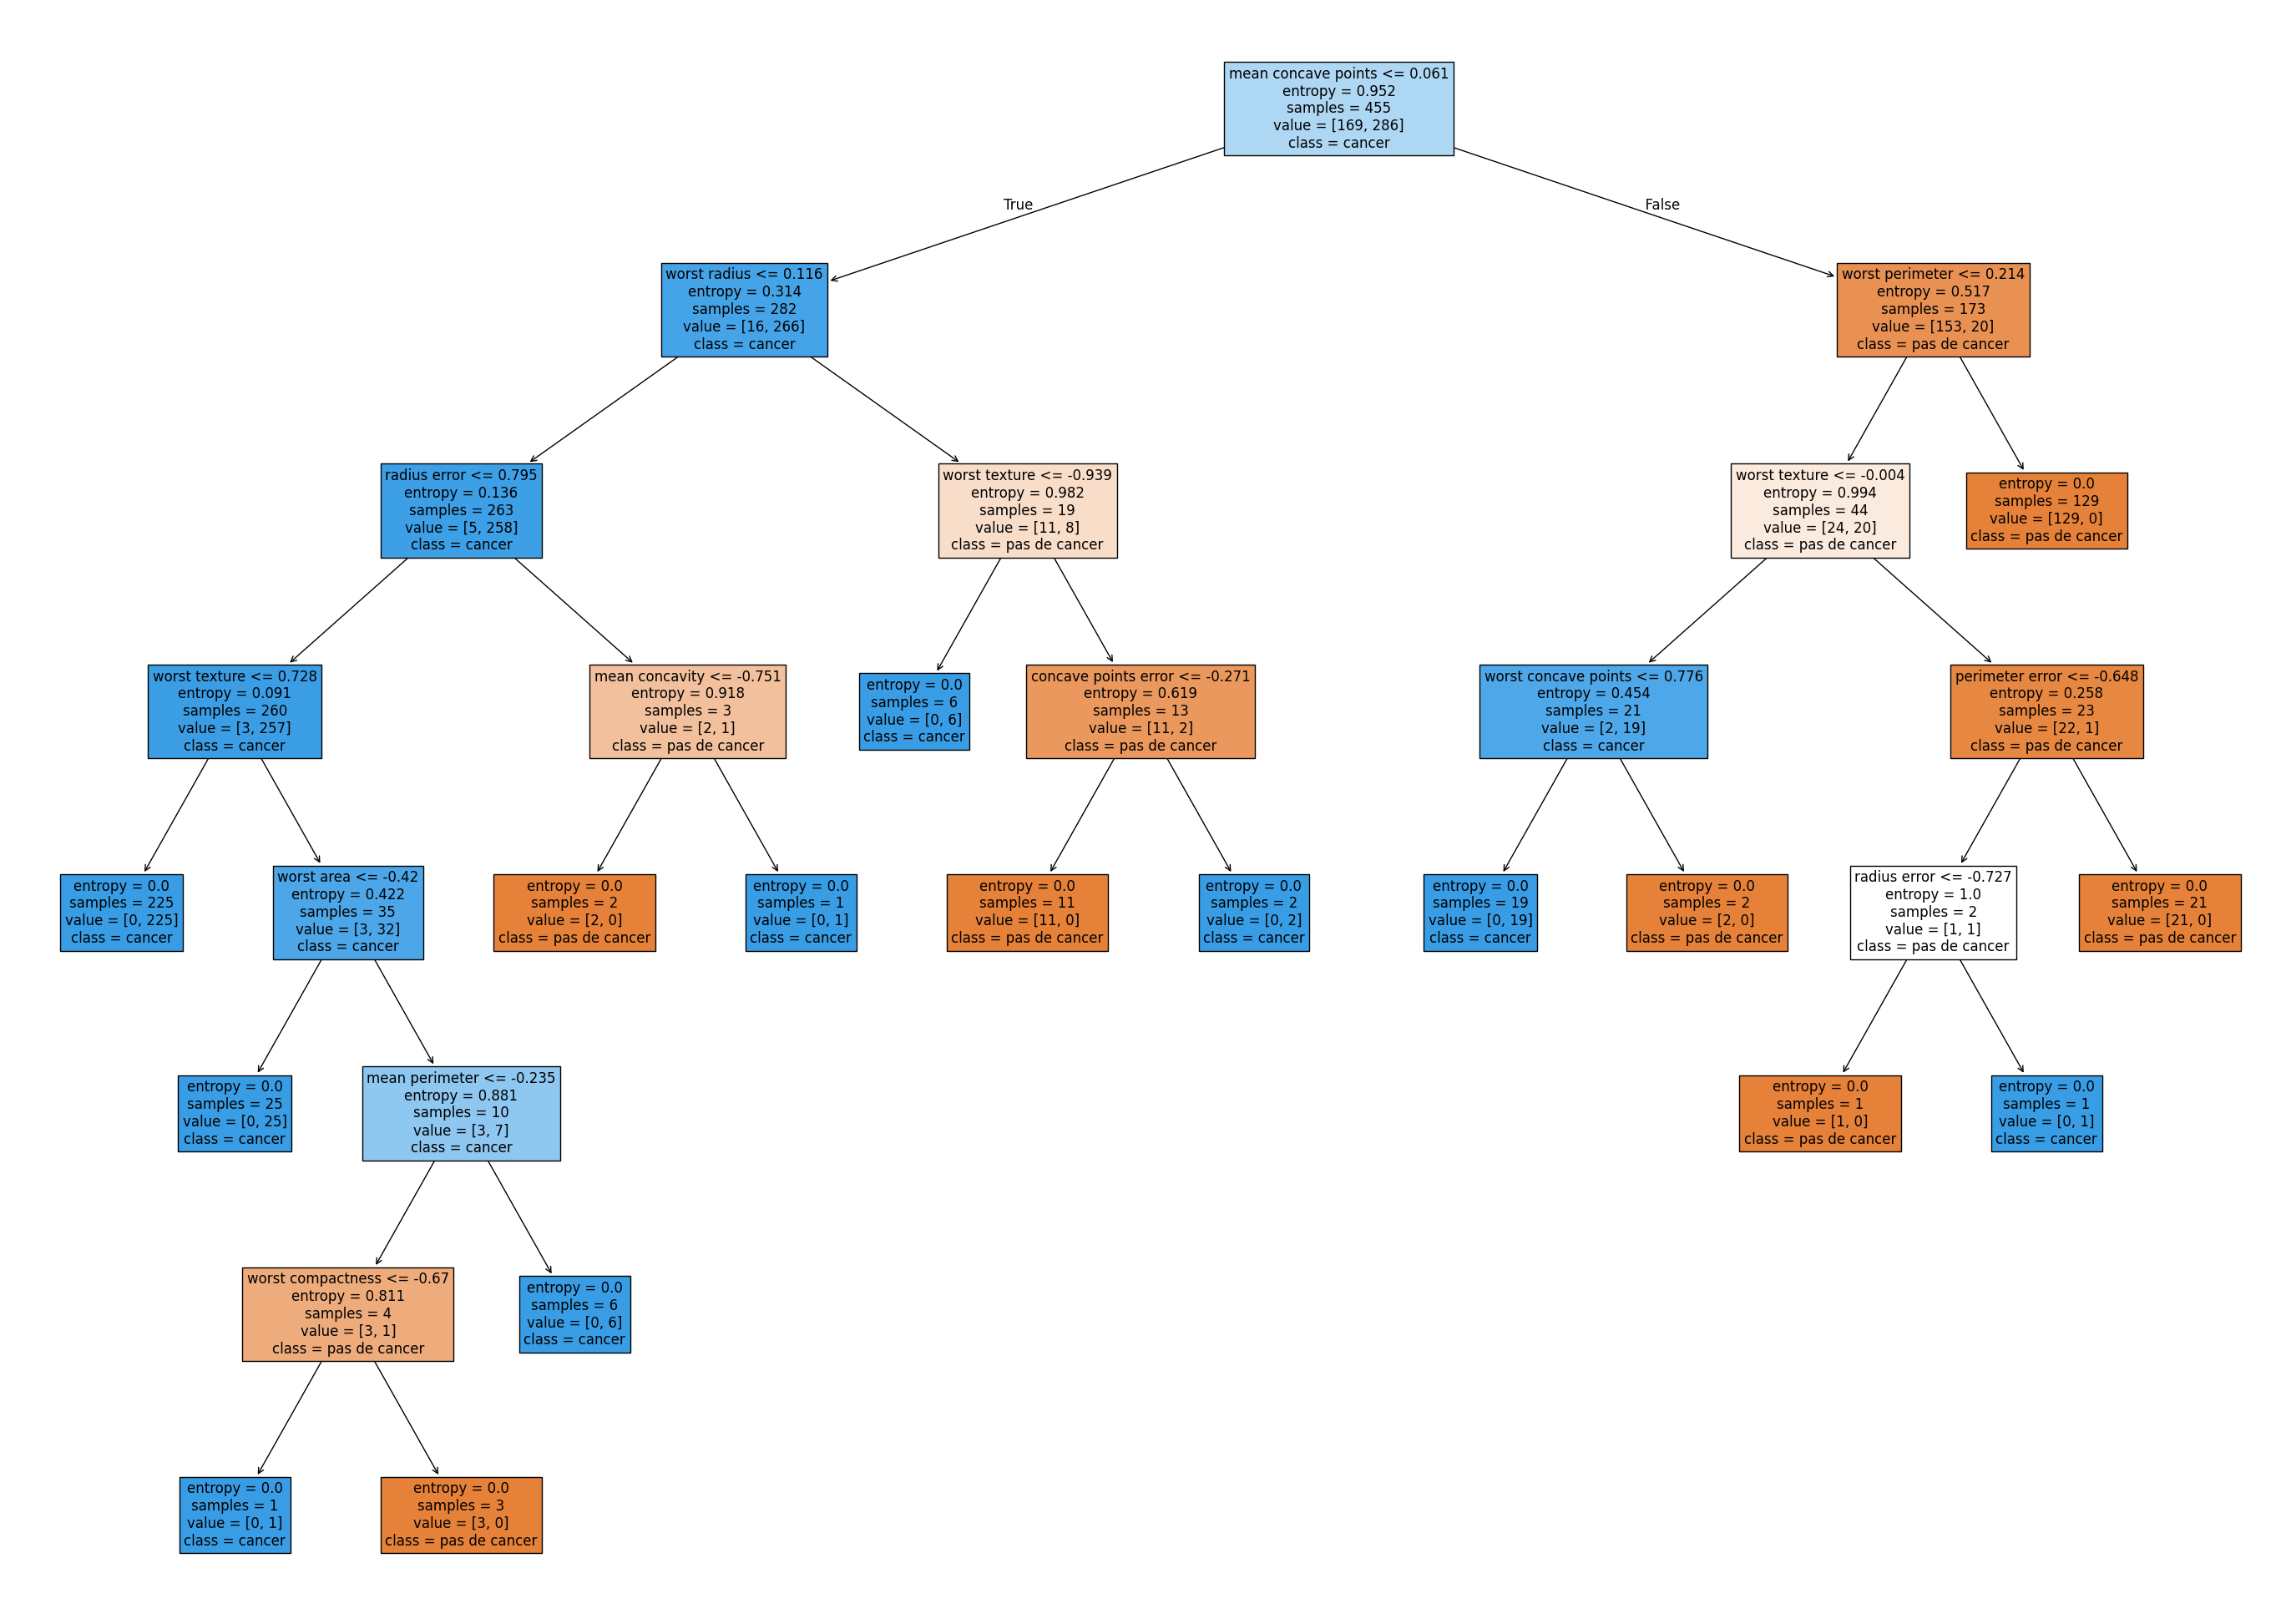

In [86]:
# Récupération des noms des features du DataFrame
feature_names = DF.columns

# Création d'une figure avec une taille spécifique (large : 35x25 pouces)
fig = plt.figure(figsize=(35,25))

# Affichage de l'arbre de décision :
# feature_names : noms des caractéristiques utilisées dans le modèle
# class_names : dictionnaire associant les classes à leurs libellés ('pas de cancer' et 'cancer')
# filled=True : remplit les nœuds avec des couleurs représentant les classes
# fontsize=12 : ajuste la taille de la police pour une meilleure lisibilité
graph = tree.plot_tree(DT_2, feature_names=feature_names, class_names= {0:'pas de cancer', 1:'cancer'}, filled=True, fontsize=12)

# 2. FAD

In [149]:
# Initialisation de la forêt d'arbres de décision avec l'entropie comme critère de division
RF_2 = RandomForestClassifier(criterion='entropy', random_state=42)

# Entraînement de la forêt d'arbres de décision
RF_2.fit(X_train, Y_train)

# Affichage des paramètres du modèle
RF_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [89]:
# Prédire les classes des données de test
pred_3 = RF_2.predict(X_test)

# Calcul de la précision du modèle avec accuracy
accuracy_score(Y_test, pred_3)

0.9649122807017544

In [90]:
# Affichage du nombre d'arbres de la forêt
len(RF_2.estimators_)

100

In [91]:
# La visualisation de quelques arbres de la forêt construite

# Extraire quelques arbres de la forêt (par exemple, les premier, deuxième et troisième arbres)
tree_to_plot1 = RF_2.estimators_[0]  # Le premier arbre de la forêt
tree_to_plot2 = RF_2.estimators_[1]  # Le deuxième arbre de la forêt
tree_to_plot3 = RF_2.estimators_[3]  # Le troisième arbre de la forêt

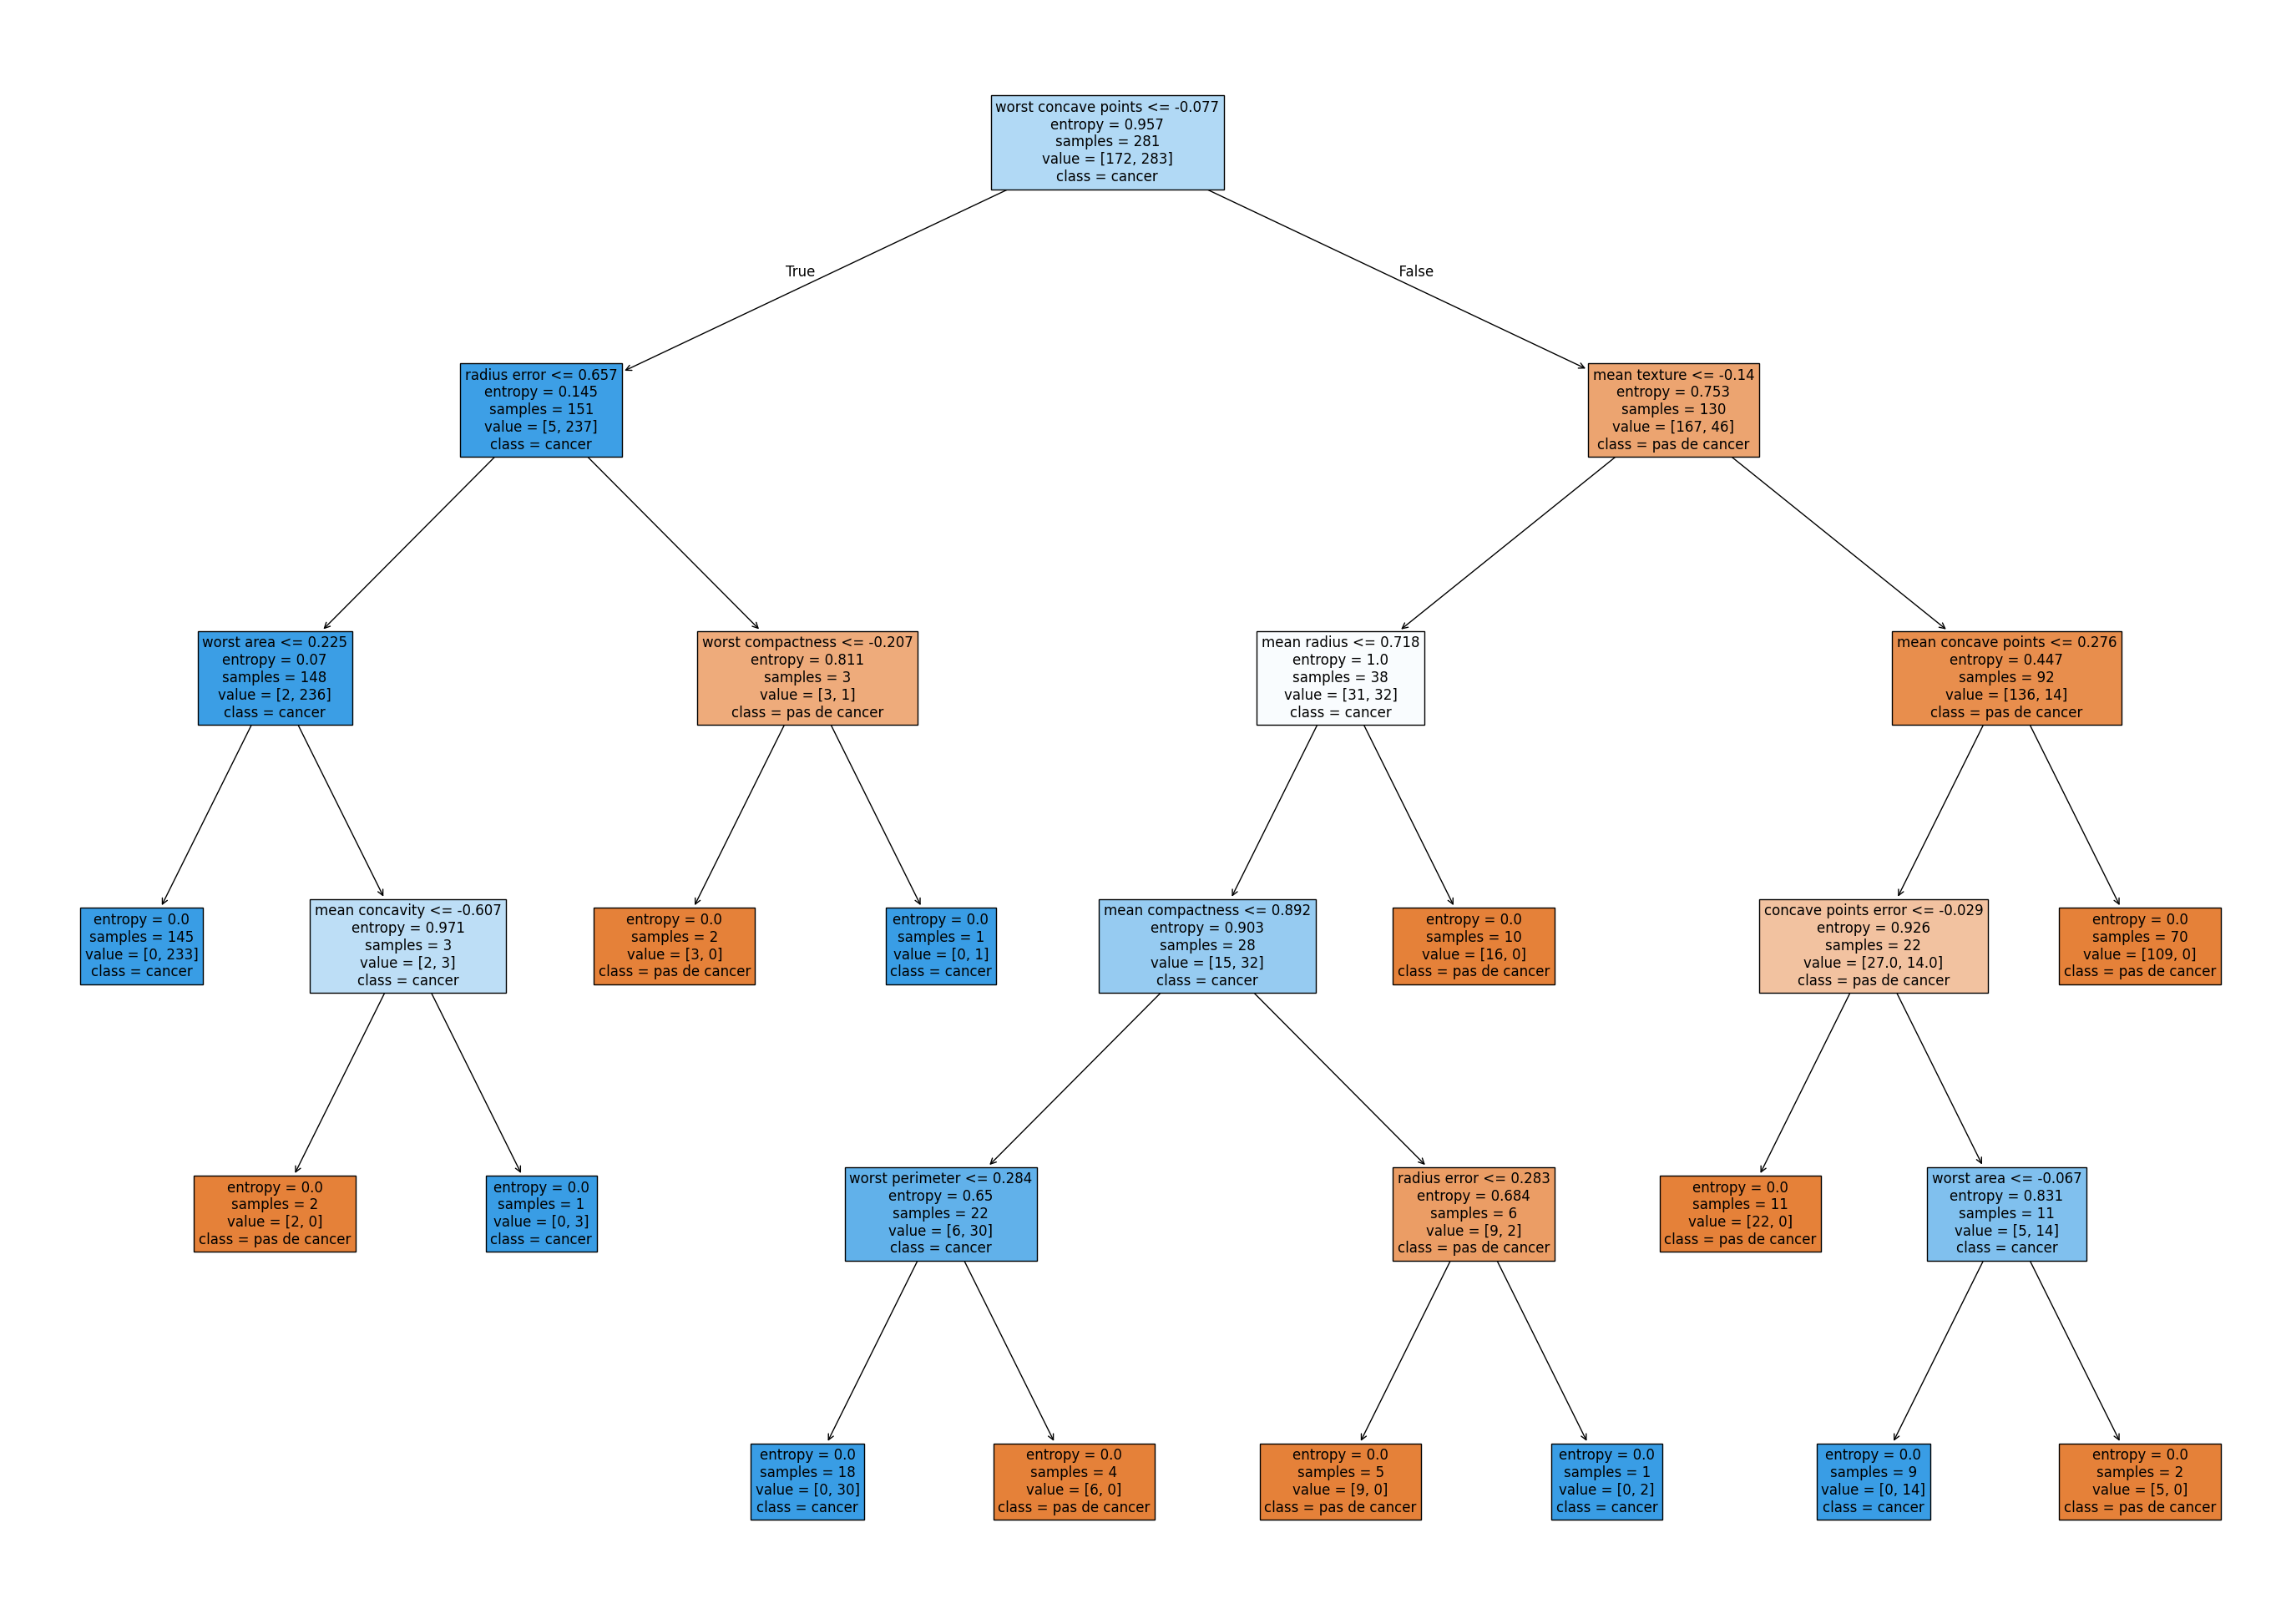

In [93]:
# Affichage premier arbre

# Création d'une figure avec une taille spécifique (large : 35x25 pouces)
fig = plt.figure(figsize=(35,25))

# feature_names : noms des caractéristiques utilisées dans le modèle
# class_names : dictionnaire associant les classes à leurs libellés ('pas de cancer' et 'cancer')
# filled=True : remplit les nœuds avec des couleurs représentant les classes
# fontsize=12 : ajuste la taille de la police pour une meilleure lisibilité
g1 = tree.plot_tree(tree_to_plot1, feature_names=feature_names, class_names={0:'pas de cancer', 1:'cancer'}, filled=True, fontsize=12)

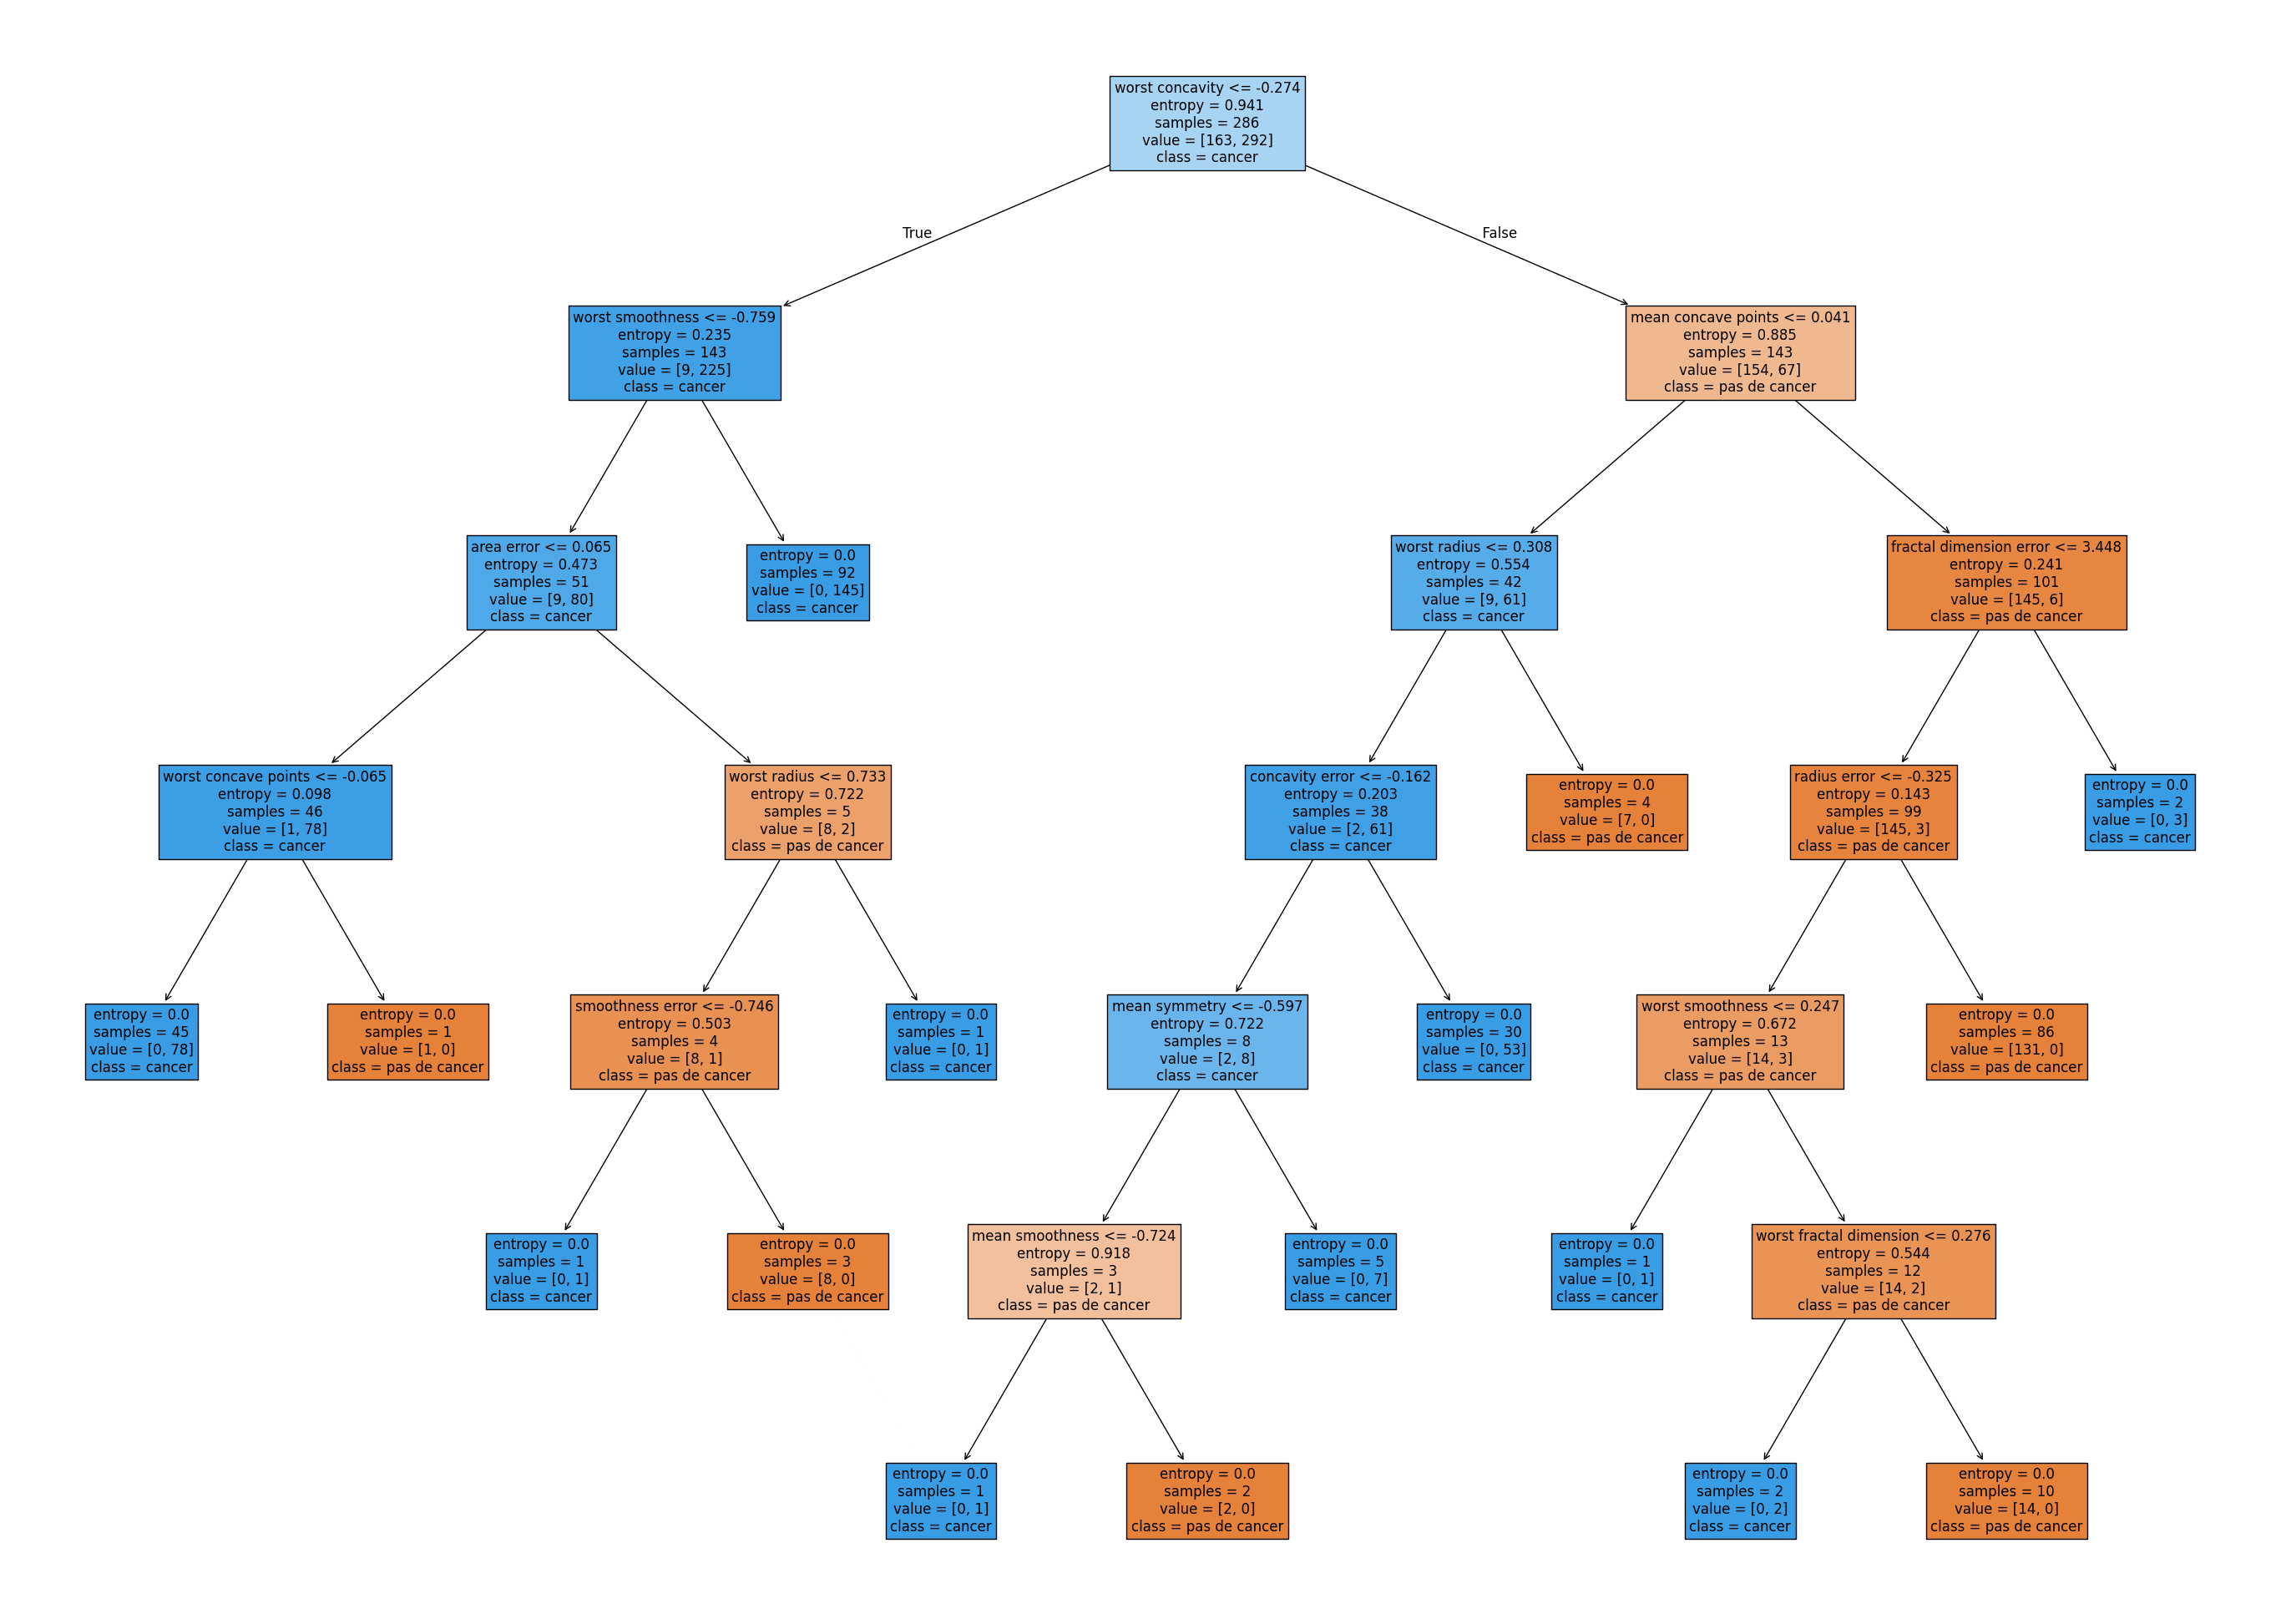

In [94]:
# Affichage deuxième arbre

# Création d'une figure avec une taille spécifique (large : 35x25 pouces)
fig = plt.figure(figsize=(35,25))

# feature_names : noms des caractéristiques utilisées dans le modèle
# class_names : dictionnaire associant les classes à leurs libellés ('pas de cancer' et 'cancer')
# filled=True : remplit les nœuds avec des couleurs représentant les classes
# fontsize=12 : ajuste la taille de la police pour une meilleure lisibilité
g2 = tree.plot_tree(tree_to_plot2, feature_names=feature_names, class_names={0:'pas de cancer', 1:'cancer'}, filled=True, fontsize=12)

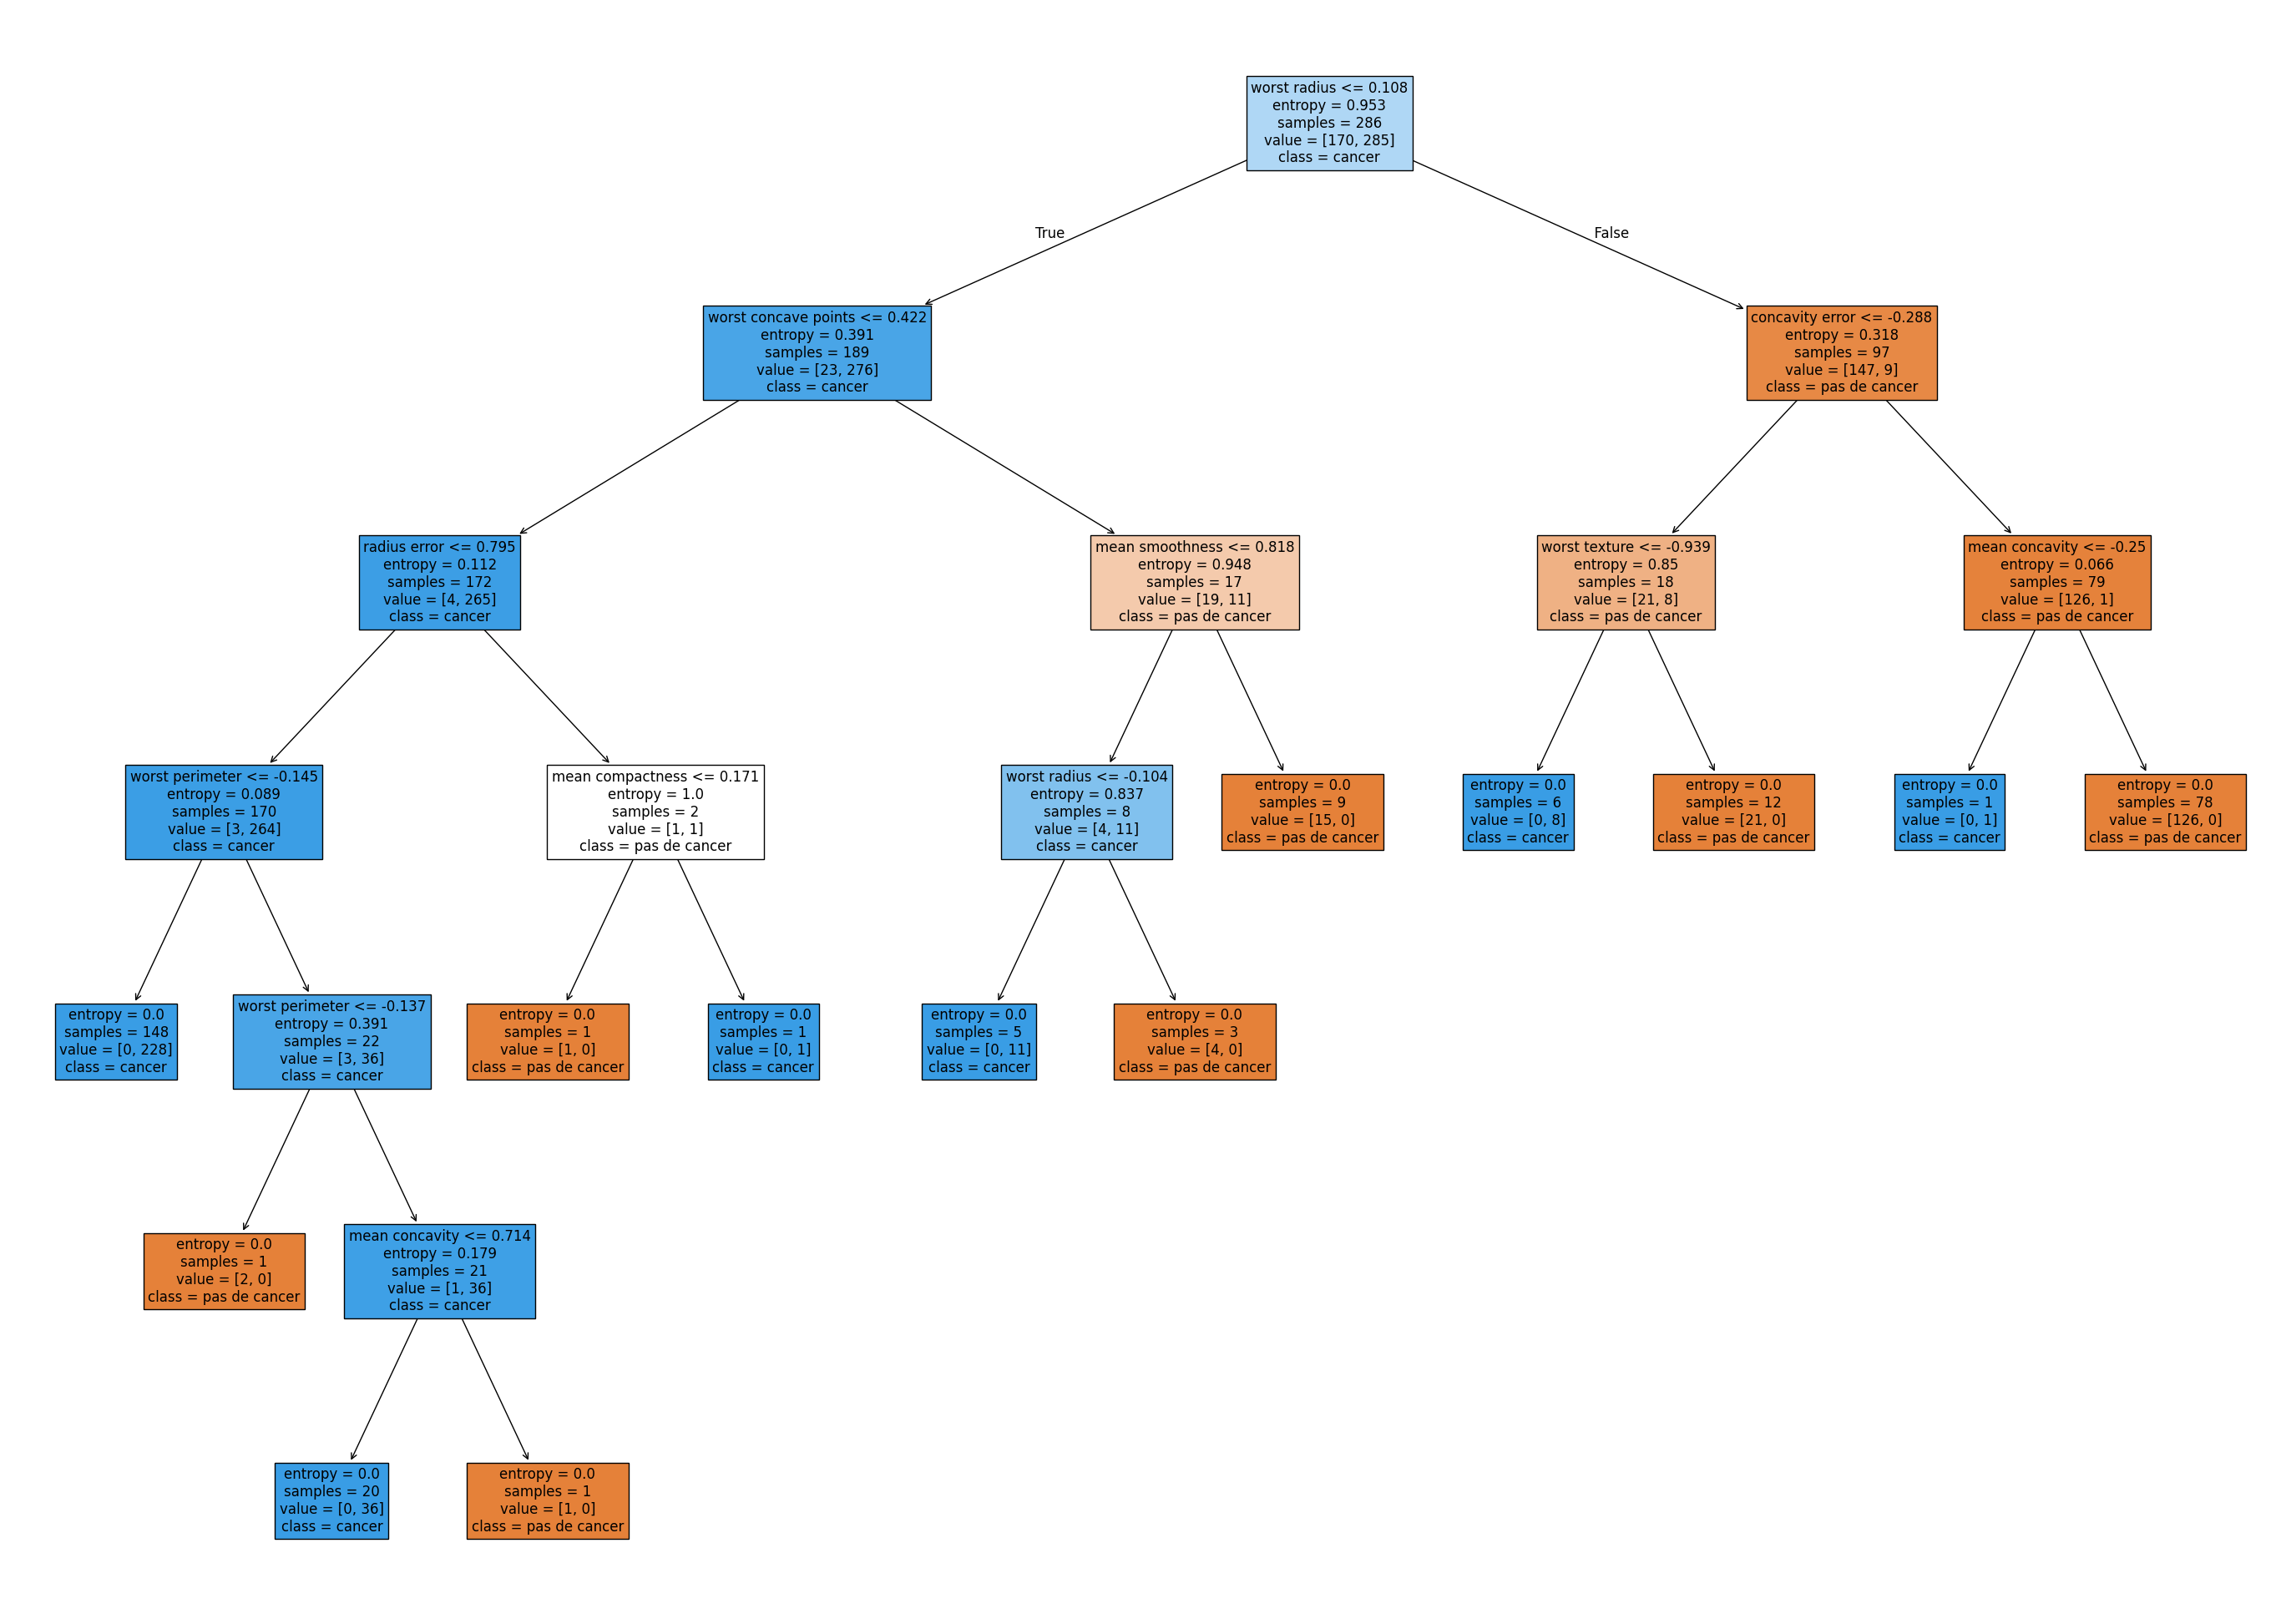

In [95]:
# Affichage troisième arbre

# Création d'une figure avec une taille spécifique (large : 35x25 pouces)
fig = plt.figure(figsize=(35,25))

# feature_names : noms des caractéristiques utilisées dans le modèle
# class_names : dictionnaire associant les classes à leurs libellés ('pas de cancer' et 'cancer')
# filled=True : remplit les nœuds avec des couleurs représentant les classes
# fontsize=12 : ajuste la taille de la police pour une meilleure lisibilité
g3 = tree.plot_tree(tree_to_plot3, feature_names=feature_names, class_names={0:'pas de cancer', 1:'cancer'}, filled=True, fontsize=12)

# 3. Bayes

L'algorithme naïves de Bayes est un algorithme d'apprentissage supervisé basés sur l'application du théorème de Bayes avec l'hypothèse "naïve" d'indépendance entre chaque paire de caractéristiques. Étant donné une variable de classe y et un vecteur de caractéristiques dépendantes $x_1$ à $x_n$, le théorème de Bayes énonce la relation suivante:

$$P(y \mid x_1, \dots, x_n) = \frac{P(x_1, \dots x_n \mid y) P(y)} {P(x_1, \dots, x_n)}$$

En utilisant l'hypothèse naïve d'indépendance suivante:


$$P(x_i | y, x_1, \dots, x_{i-1}, x_{i+1}, \dots, x_n) = P(x_i | y)$$

pour tout i, cette relation se simplifie en :

$$P(y \mid x_1, \dots, x_n) = \frac{\prod_{i=1}^{n} P(x_i \mid y) P(y)} {P(x_1, \dots, x_n)}$$


Lorsqu'il s'agit de données continues, une hypothèse typique est que les valeurs continues associées à chaque classe sont distribuées selon une distribution gaussienne qui s'ecrit selon l'equation suivante:

$$p(x=v|c)=\frac{1}{\sqrt{2\pi\sigma^2_c}}\,e^{ -\frac{(v-\mu_c)^2}{2\sigma^2_c} }$$

In [96]:
class Naive_Bayes_Model:

    # Initialisation du modèle Naïve Bayes avec les classes, moyennes, variances et probabilités a priori
    def __init__(self, classes=None, moyenne=None, variance=None, proba_priori=None):
        self.classes = classes  # Classes cibles possibles (par exemple, 0 ou 1 pour une classification binaire)
        self.moyenne = moyenne  # Moyennes des caractéristiques pour chaque classe
        self.variance = variance  # Variance des caractéristiques pour chaque classe
        self._priors = proba_priori  # Probabilités a priori des classes

    # Fonction d'entraînement pour calculer les moyennes, variances et probabilités a priori pour chaque classe
    def Training(self, X_train, Y_train):
        n_samples, n_features = X_train.shape  # Récupère la forme des données d'entraînement (nombre d'échantillons et de caractéristiques)
        self.classes = np.unique(Y_train)  # Identification des classes uniques dans Y_train
        nb_classes = len(self.classes)  # Nombre de classes

        # Initialisation des paramètres : moyennes, variances et probabilités a priori
        self.moyenne = np.zeros((nb_classes, n_features), dtype=np.float64)  # Moyennes des caractéristiques pour chaque classe
        self.variance = np.zeros((nb_classes, n_features), dtype=np.float64)  # Variances des caractéristiques pour chaque classe
        self.proba_priori = np.zeros(nb_classes, dtype=np.float64)  # Probabilités a priori pour chaque classe

        # Calcul des paramètres pour chaque classe
        for i, classe in enumerate(self.classes):
            X_features_classe_i = X_train[Y_train == classe]  # Sélectionner les échantillons appartenant à la classe i
            self.moyenne[i, :] = X_features_classe_i.mean(axis=0)  # Moyenne des caractéristiques pour la classe i
            self.variance[i, :] = X_features_classe_i.var(axis=0)  # Variance des caractéristiques pour la classe i
            self.proba_priori[i] = X_features_classe_i.shape[0] / float(n_samples)  # Calcul de la probabilité a priori de la classe i

    # Fonction qui calcule la probabilité d'une observation donnée appartenant à une classe, en supposant une distribution normale (gaussienne)
    def Distribution_proba_Gauss(self, classe, X_train):
        moyenne = self.moyenne[classe]  # Moyenne pour la classe donnée
        variance = self.variance[classe]  # Variance pour la classe donnée
        # Calcul de la fonction de densité de probabilité gaussienne (normale)
        A = np.exp(-((X_train - moyenne) ** 2) / (2 * variance))  # Exponentielle
        B = np.sqrt(2 * np.pi * variance)  # Normalisation par la racine carrée de 2π et variance
        loi_gauss = A / B  # Retourne la probabilité gaussienne
        return loi_gauss

    # Fonction qui calcule la classe ayant la plus haute probabilité a posteriori pour un échantillon donné
    def maxProb_posteriori(self, X_test):
        liste_proba = []  # Liste pour stocker les probabilités a posteriori pour chaque classe

        # Calcul des probabilités a posteriori pour chaque classe
        for i, classe in enumerate(self.classes):  # Pour chaque classe
            P_prior = np.log(self.proba_priori[i])  # Calcul de la probabilité a priori en prenant le log pour éviter les petites valeurs
            P_posterior = np.sum(np.log(self.Distribution_proba_Gauss(i, X_test)))  # Somme des logs des probabilités gaussiennes
            P_posterior = P_prior + P_posterior  # Probabilité a posteriori = probabilité a priori + probabilité des caractéristiques
            liste_proba.append(P_posterior)  # Ajouter la probabilité a posteriori pour la classe

        # Retourner la classe avec la probabilité a posteriori la plus élevée
        return self.classes[np.argmax(liste_proba)]

    # Fonction qui effectue la prédiction pour un ensemble de test
    def model_prediction(self, X_test):
        # Applique la fonction maxProb_posteriori à chaque échantillon de X_test pour prédire la classe
        y_pred = [self.maxProb_posteriori(i) for i in X_test]
        return np.array(y_pred)  # Retourne les prédictions sous forme d'un tableau numpy


In [97]:
def accuracy(label, y_pred):
    # Calcule la précision (accuracy) en comparant les étiquettes réelles (label)
    # et les prédictions (y_pred).

    # np.sum(label == y_pred) compte le nombre de fois où les étiquettes réelles
    # et les prédictions sont égales.
    # len(label) donne le nombre total d'étiquettes (ou d'exemples).

    # La précision est le rapport entre le nombre de prédictions correctes
    # et le nombre total d'exemples.
    accuracy = np.sum(label == y_pred) / len(label)
    # Retourne la précision calculée.
    return accuracy

In [101]:
# Création d'une instance du modèle Naive Bayes
model = Naive_Bayes_Model()

# Entraînement du modèle avec les données d'apprentissage
model.Training(X_train, Y_train)

In [103]:
# Prédire les classes des données de test
predictions = model.model_prediction(X_test)

# Calcul de la précision du modèle avec accuracy
evaluation = accuracy(Y_test, predictions)

print("La precision du model Naive Bayes est: ", np.round(evaluation, 2),'%')

La precision du model Naive Bayes est:  0.96 %


**Naive Bayes dans SKlearn**  [Doc](https://scikit-learn.org/stable/modules/naive_bayes.html)

In [148]:
# Création d'une instance du modèle Naive Bayes avec la bibliothèque Scikit-learn
NB_classifier = GaussianNB()

# Entraînement du modèle avec les données d'apprentissage
NB_model = NB_classifier.fit(X_train, Y_train)

In [105]:
# Prédire les classes des données de test
NB_pred = NB_model.predict(X_test)

In [106]:
# Calcul de la précision du modèle avec accuracy
model_accuracy = accuracy(Y_test, NB_pred )

print("Accuracy du model de SKlearn est: ", np.round(model_accuracy, 2), '%')

Accuracy du model de SKlearn est:  0.96 %


# 4. Perceptron

In [107]:
class Perceptron_Model:

    # Initialisation du modèle Perceptron avec taux d'apprentissage et nombre d'itérations
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate  # Taux d'apprentissage (learning rate) utilisé pour ajuster les poids
        self.n_iterations = n_iterations  # Nombre d'itérations pour l'entraînement
        self.weights = None  # Poids à initialiser pendant l'entraînement
        self.bias = None  # Biais à initialiser pendant l'entraînement

    # Fonction d'entraînement du perceptron, utilisant la descente de gradient pour ajuster les poids et le biais
    def Training(self, X_train, Y_train):
        n_samples, n_features = X_train.shape  # Nombre d'échantillons et de caractéristiques dans les données d'entraînement
        # Initialisation des poids et du biais
        self.weights = np.zeros(n_features)  # Initialisation des poids à zéro (poids pour chaque caractéristique)
        self.bias = 0  # Initialisation du biais à zéro

        # Entraînement avec la descente de gradient : on met à jour les poids et le biais
        for _ in range(self.n_iterations):  # Pour chaque itération
            for idx, x_i in enumerate(X_train):  # Pour chaque échantillon dans les données d'entraînement
                linear_output = np.dot(x_i, self.weights) + self.bias  # Calcul de la sortie linéaire (produit scalaire des caractéristiques et des poids + biais)
                y_pred = self._step_function(linear_output)  # Application de la fonction de seuil (activation) pour la prédiction
                # Mise à jour des poids et du biais en fonction de l'erreur (différence entre la prédiction et la vraie étiquette)
                update = self.learning_rate * (Y_train[idx] - y_pred)  # Calcul de l'erreur et ajustement des poids
                self.weights += update * x_i  # Mise à jour des poids (ajout de l'erreur pondérée par les caractéristiques)
                self.bias += update  # Mise à jour du biais (ajout de l'erreur)

    # Fonction de seuil : retourne 1 si la sortie est positive, sinon 0
    def _step_function(self, x):
        return np.where(x >= 0, 1, 0)  # Si x est positif ou nul, retourne 1, sinon retourne 0

    # Fonction pour prédire la classe pour de nouveaux échantillons
    def model_prediction(self, X_test):
        linear_output = np.dot(X_test, self.weights) + self.bias  # Calcul de la sortie linéaire pour les échantillons de test
        return self._step_function(linear_output)  # Retourne la prédiction en appliquant la fonction de seuil

In [108]:
# Création d'une instance de Perceptron_Model
model = Perceptron_Model()

# Entraînement de Perceptron_Model avec les données d'apprentissage
model.Training(X_train, Y_train)

In [109]:
# Prédire les classes des données de test
predictions = model.model_prediction(X_test)

# Calcul de la précision de Perceptron_Model avec accuracy
evaluation = accuracy(Y_test, predictions)

print("La precision du model Perceptron est: ", np.round(evaluation, 2),'%')

La precision du model Perceptron est:  0.93 %


# 5. Perceptron multi-couche

In [112]:
class MLP_Model_GradientDescent:
    # Initialisation de la classe pour un perceptron multi-couche avec descente de gradient
    def __init__(self, n_hidden=5, learning_rate=0.01, n_iterations=1000):
        # Initialisation des paramètres de l'algorithme (couches cachées, taux d'apprentissage et nombre d'itérations)
        self.n_hidden = n_hidden
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

        self.weights_hidden = None # Poids de la couche cachée
        self.bias_hidden = None # Biais de la couche cachée
        self.weights_output = None  # Poids de la couche de sortie
        self.bias_output = None    # Biais de la couche de sortie

    def Training(self, X_train, Y_train):
        # Fonction d'entraînement du modèle avec des données d'entrée X_train et des étiquettes Y_train
        n_samples, n_features = X_train.shape # Nombre d'échantillons et de caractéristiques
        n_classes = len(np.unique(Y_train)) # Nombre de classes dans Y_train

        # Initialisation des poids et biais
        self.weights_hidden = np.random.randn(n_features, self.n_hidden) # Poids de la couche cachée
        self.bias_hidden = np.zeros(self.n_hidden)   # Biais de la couche cachée initialisé à zéro
        self.weights_output = np.random.randn(self.n_hidden, n_classes)  # Poids de la couche de sortie
        self.bias_output = np.zeros(n_classes)  # Biais de la couche de sortie initialisé à zéro

        # Entraînement avec descente de gradient
        for _ in range(self.n_iterations):# Répéter l'entraînement pour n_iterations fois
            for idx, x_i in enumerate(X_train):# Itération sur chaque échantillon d'entraînement
                # Propagation avant pour la couche cachée
                hidden_layer_input = np.dot(x_i, self.weights_hidden) + self.bias_hidden # Calcul de l'entrée de la couche cachée
                hidden_layer_output = self._sigmoid(hidden_layer_input) # Appliquer la fonction d'activation sigmoid

                # Propagation avant pour la couche de sortie
                output_layer_input = np.dot(hidden_layer_output, self.weights_output) + self.bias_output # Entrée de la couche de sortie
                output_layer_output = self._softmax(output_layer_input) # Appliquer la fonction d'activation softmax

                # Calcul de l'erreur entre la sortie du modèle et la vérité terrain (encodée en one-hot)
                error = output_layer_output - self._one_hot_encoding(Y_train[idx], n_classes)

                # Calcul des gradients pour la descente de gradient
                d_output = error # Gradient de la sortie

                d_hidden = d_output.dot(self.weights_output.T) * self._sigmoid_derivative(hidden_layer_output) # Gradient de la couche cachée

                # Mise à jour des poids et biais
                self.weights_output -= self.learning_rate * np.outer(hidden_layer_output, d_output)  # Mise à jour des poids de la couche de sortie
                self.bias_output -= self.learning_rate * d_output # Mise à jour des biais de la couche de sortie
                self.weights_hidden -= self.learning_rate * np.outer(x_i, d_hidden) # Mise à jour des poids de la couche cachée
                self.bias_hidden -= self.learning_rate * d_hidden # Mise à jour des biais de la couche cachée

    def _sigmoid(self, x):
        # Fonction d'activation sigmoid
        return 1 / (1 + np.exp(-x)) # Retourne la sortie de la fonction sigmoid

    def _sigmoid_derivative(self, x):
        # Dérivée de la fonction sigmoid
        return x * (1 - x) # Calcul de la dérivée de la sigmoid

    def _softmax(self, x):
        # Fonction d'activation softmax pour les sorties
        exp_x = np.exp(x - np.max(x))# Calcul exponentiel de chaque valeur d'entrée pour éviter les grands nombres
        return exp_x / exp_x.sum(axis=0, keepdims=True) # Retourne les probabilités normalisées

    def _one_hot_encoding(self, label, n_classes):
        # Encodage one-hot pour une étiquette donnée
        one_hot = np.zeros(n_classes) # Crée un tableau avec des zéros de taille n_classes
        one_hot[label] = 1 # L'index correspondant à l'étiquette devient 1
        return one_hot

    def model_prediction(self, X_test):
        # Prédiction du modèle pour un jeu de données de test X_test
        hidden_layer_input = np.dot(X_test, self.weights_hidden) + self.bias_hidden # Calcul de l'entrée de la couche cachée
        hidden_layer_output = self._sigmoid(hidden_layer_input) # Appliquer la fonction sigmoid à l'entrée cachée

        output_layer_input = np.dot(hidden_layer_output, self.weights_output) + self.bias_output # Entrée de la couche de sortie
        output_layer_output = self._softmax(output_layer_input) # Appliquer softmax à la sortie

        return np.argmax(output_layer_output, axis=1) # Retourne l'indice de la classe avec la plus grande probabilité (prédiction du modèle)


In [113]:
# Création d'une instance de MLP_Model_GradientDescent
model = MLP_Model_GradientDescent()

# Entraînement de Perceptron_Model avec les données d'apprentissage
model.Training(X_train, Y_train)

In [114]:
# Prédire les classes des données de test
predictions = model.model_prediction(X_test)

# Calcul de la précision de Perceptron_Model avec accuracy
evaluation = accuracy(Y_test, predictions)

print("La precision du model MLP est: ", np.round(evaluation, 2),'%')

La precision du model MLP est:  0.97 %


**Tâche à réaliser : Classification AD, FAD, Bayes, Perceptron et MLP en utilisant les librairies sk-learn**

**Contexte :**
**Dans cette tâche, vous utiliserez un jeu de données appelé gene_expression_cancer.**
**L objectif de cette activité est d appliquer plusieurs méthodes de classification pour prédire les catégories**
**de cancer à partir des données d expression génétique. Vous devez comparer les temps de calculs.**
**En utilisant une PCA vous devez afficher la frontière de décision pour chacun des classifieurs,**
**de plus vous devez dans un diagramme en barre afficher le temps de calcul qu effectue chaque classifieur**

## <div class="alert alert-block alert-info">Vous devez retourner ce notebook avec les commentaires sur l'ensemble du code y compris la partie faite durant la séance de l'atelier !</div>

In [115]:
from sklearn.preprocessing import LabelEncoder # importer LabelEncoder pour convertir les données catégorielles en numerique

**Chargement des jeux de données**

**1.   Le chargement des jeux de données des caractéristiques**

In [116]:
data = pd.read_csv("/content/drive/MyDrive/Atelier 5/TCGA-PANCAN-HiSeq-801x20531/data.csv")
data= data.drop(data.columns[0], axis=1)

**2.   Le chargement des jeux de données de la variable cible**

In [117]:
labels = pd.read_csv("/content/drive/MyDrive/Atelier 5/TCGA-PANCAN-HiSeq-801x20531/labels.csv")
labels= labels.drop(labels.columns[0], axis=1)

**Encodage de la variable categorique labels**

In [118]:
label_encoder = LabelEncoder() # objet de labelEncoder
labels["class_Label"] = label_encoder.fit_transform(labels["Class"]) # transforme les valeurs de Sexe par label_encoder

**Normalisation et division du Dataset en Data train et test**

In [119]:
scaler = StandardScaler() # Création d'un objet StandardScaler

# Normalisation des caractéristiques : transformation pour avoir une moyenne de 0 et un écart-type de 1
data_scaled = scaler.fit_transform(data)

# Division du dataset en données d'entraînement (80%) et de test (20%)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(data_scaled, labels["class_Label"], test_size=0.2, random_state=42)



**1. AD**




In [157]:
# Construction d'un arbre de décision avec le critière Entropie
DT = DecisionTreeClassifier(criterion='entropy')
# entrainement de l'arbre de décision
DT.fit(X1_train, Y1_train)
# Affichage des paramètres de l'arbre
DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [158]:
DT.get_n_leaves() # nombre de feuilles de mon arbre

np.int64(8)

In [159]:
# Prédire les classes des données de test
pred = DT.predict(X1_test)
# Calcul de la précision de l'arbre de décision avec accuracy
accuracy_score(Y1_test, pred)

0.9751552795031055

<Figure size 3500x2500 with 0 Axes>

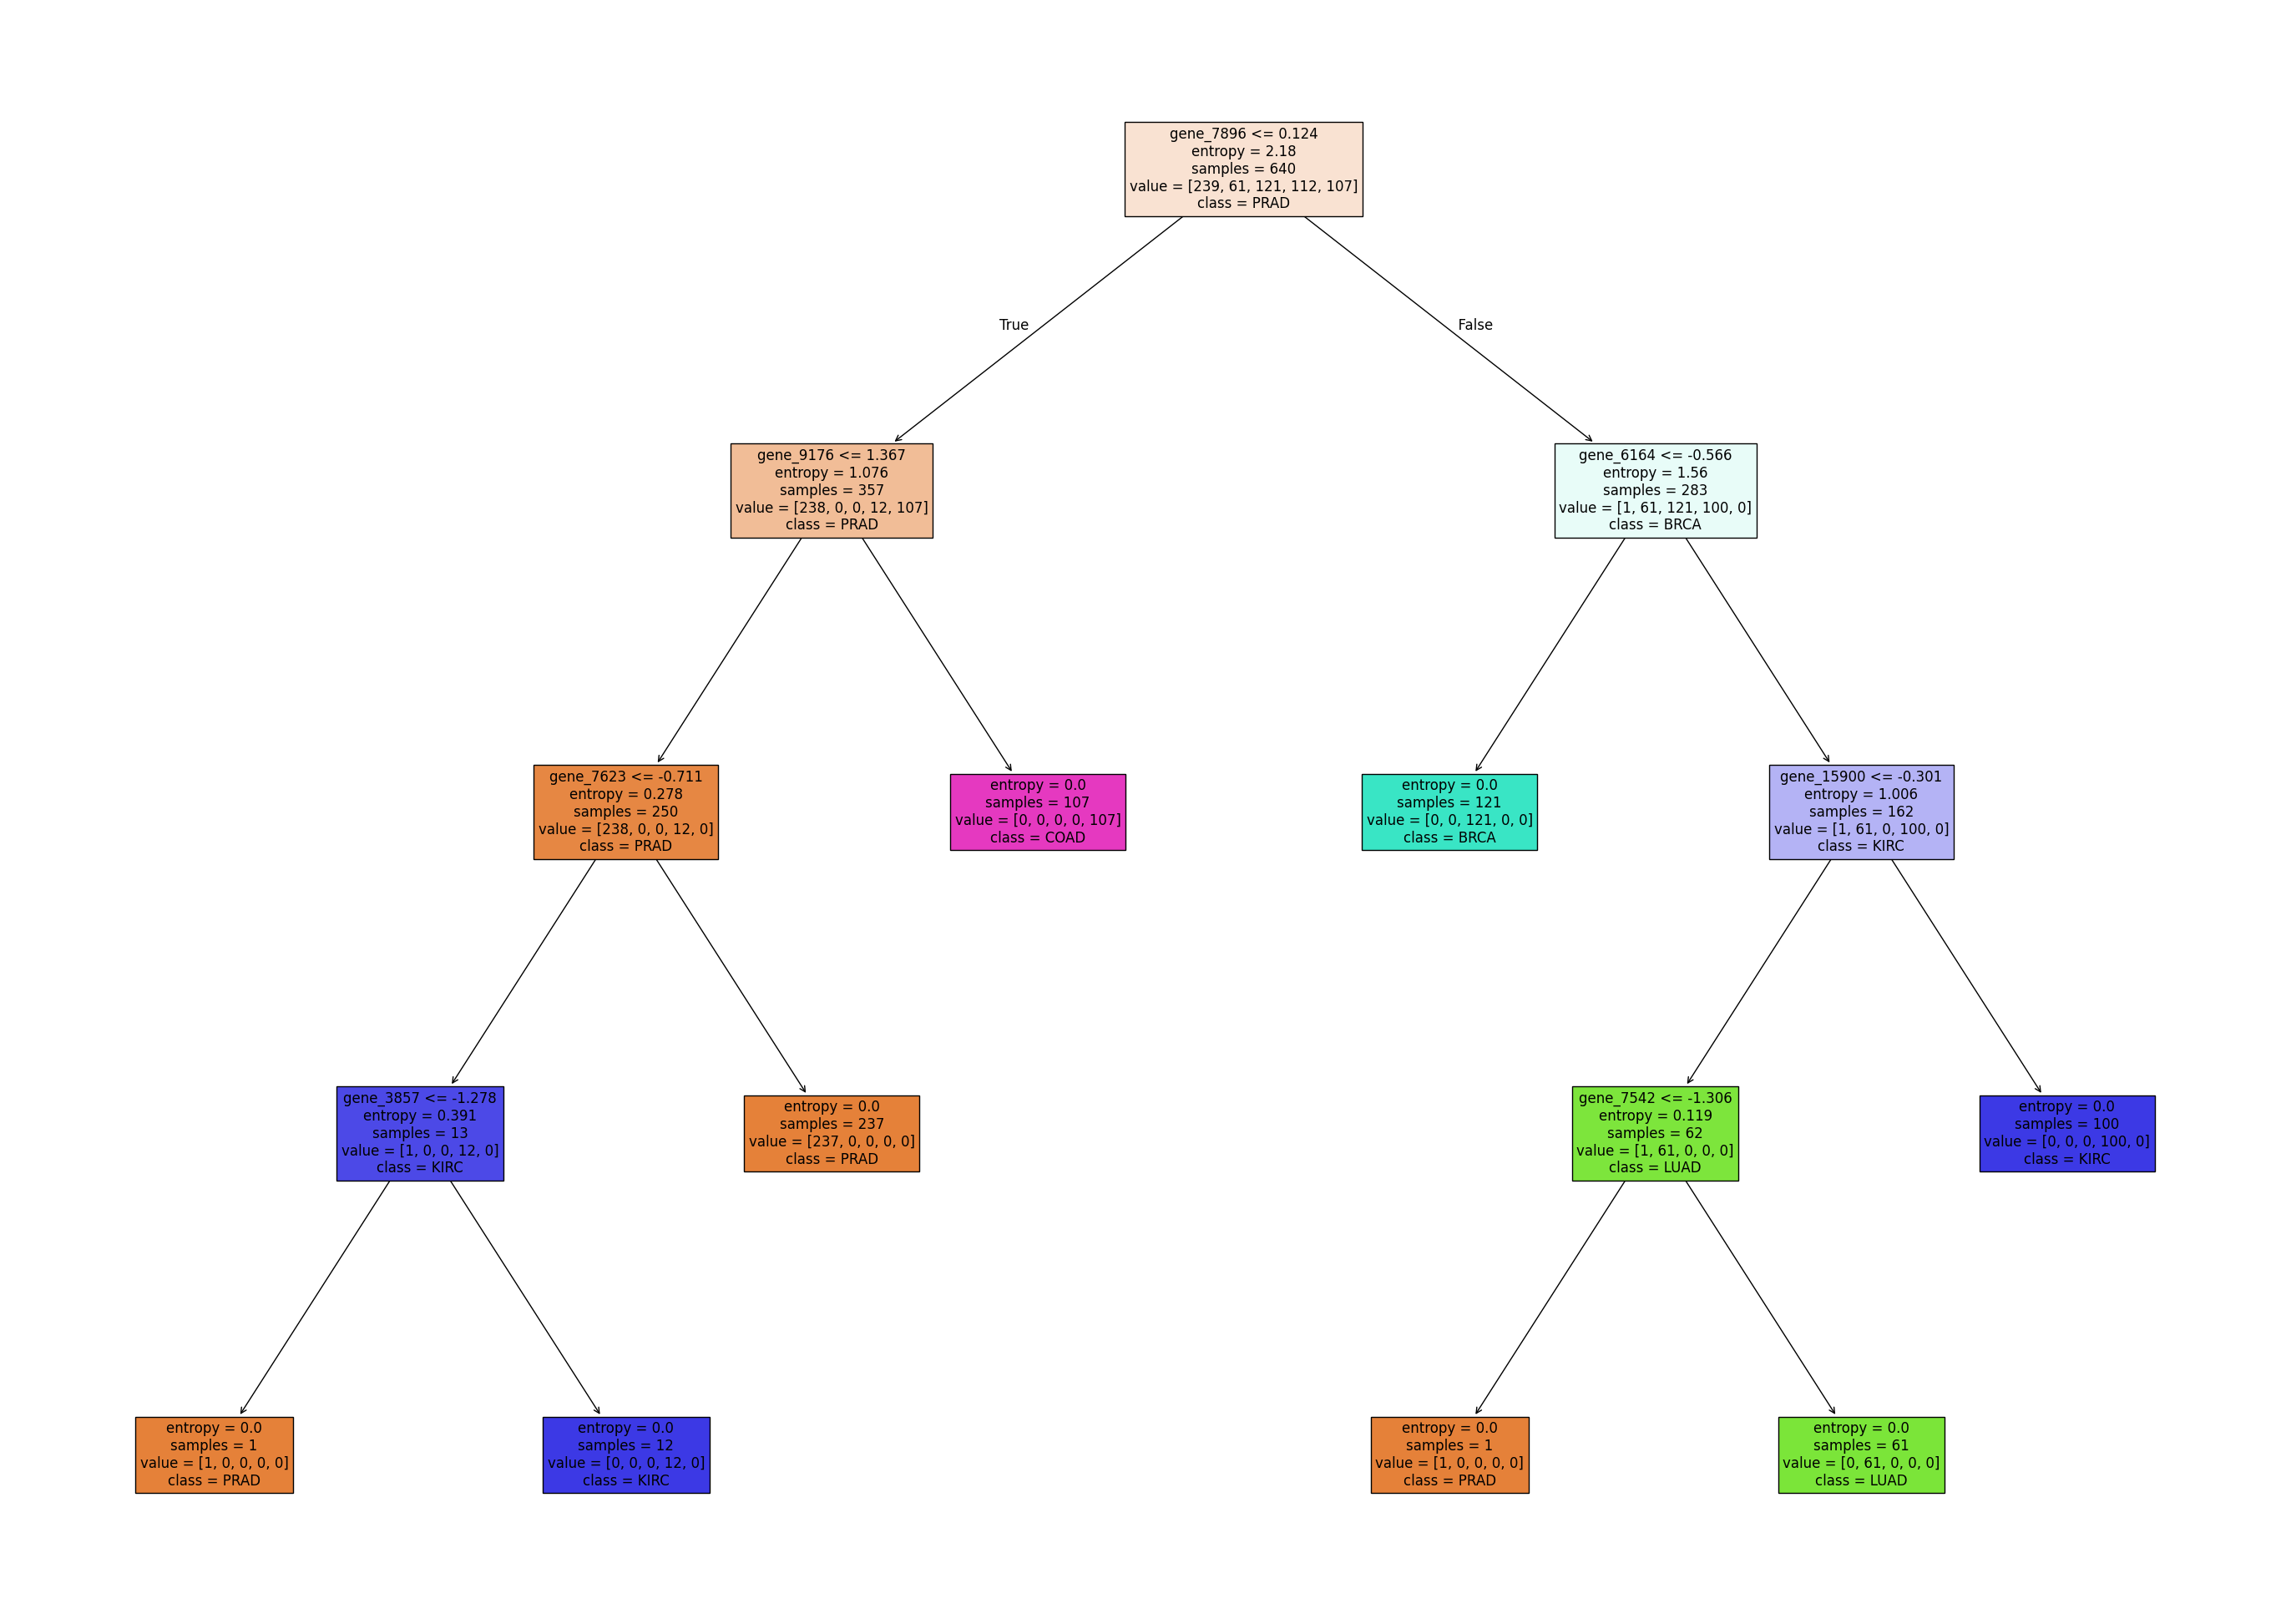

In [160]:
# Récupération des noms des features du DataFrame
feature_names = DF.columns

# Création d'une figure avec une taille spécifique (large : 35x25 pouces)
fig = plt.figure(figsize=(35,25))

# Affichage de l'arbre de décision :
# feature_names : noms des caractéristiques utilisées dans le modèle
# class_names : dictionnaire associant les classes à leurs libellés ('pas de cancer' et 'cancer')
# filled=True : remplit les nœuds avec des couleurs représentant les classes
# fontsize=12 : ajuste la taille de la police pour une meilleure lisibilité





# Récupération des noms des features du DataFrame
feature_names = data.columns

# Création d'une figure avec une taille spécifique (large : 35x25 pouces)
fig = plt.figure(figsize=(35,25))

# Affichage de l'arbre de décision :
# feature_names : noms des caractéristiques utilisées dans le modèle
# class_names : dictionnaire associant les classes à leurs libellés (0:'PRAD', 1:'LUAD',2:'BRCA',3:'KIRC',4:'COAD')
# filled=True : remplit les nœuds avec des couleurs représentant les classes
# fontsize=12 : ajuste la taille de la police pour une meilleure lisibilité
graph = tree.plot_tree(DT, feature_names=feature_names, class_names= {0:'PRAD', 1:'LUAD',2:'BRCA',3:'KIRC',4:'COAD'}, filled=True, fontsize=12)

**2. FAD**

In [161]:
# Initialisation de la forêt d'arbres de décision avec l'entropie comme critère de division
RF_2 = RandomForestClassifier(criterion='entropy', random_state=42)

# Entraînement de la forêt d'arbres de décision
RF_2.fit(X1_train, Y1_train)

# Affichage des paramètres du modèle
RF_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [179]:
# Prédire les classes des données de test
pred_3 = RF_2.predict(X1_test)

# Calcul de la précision de l'arbre de décision avec accuracy
accuracy_score(Y1_test, pred_3)

1.0

In [163]:
# Affichage du nombre d'arbres de la forêt
len(RF_2.estimators_)

100

In [164]:
# La visualisation de quelques arbres de la forêt construite

# Extraire quelques arbres de la forêt (par exemple, les premier, deuxième et troisième arbres)
tree_to_plot1 = RF_2.estimators_[0]  # Le premier arbre de la forêt
tree_to_plot2 = RF_2.estimators_[1]  # Le deuxième arbre de la forêt
tree_to_plot3 = RF_2.estimators_[3]  # Le troisième arbre de la forêt

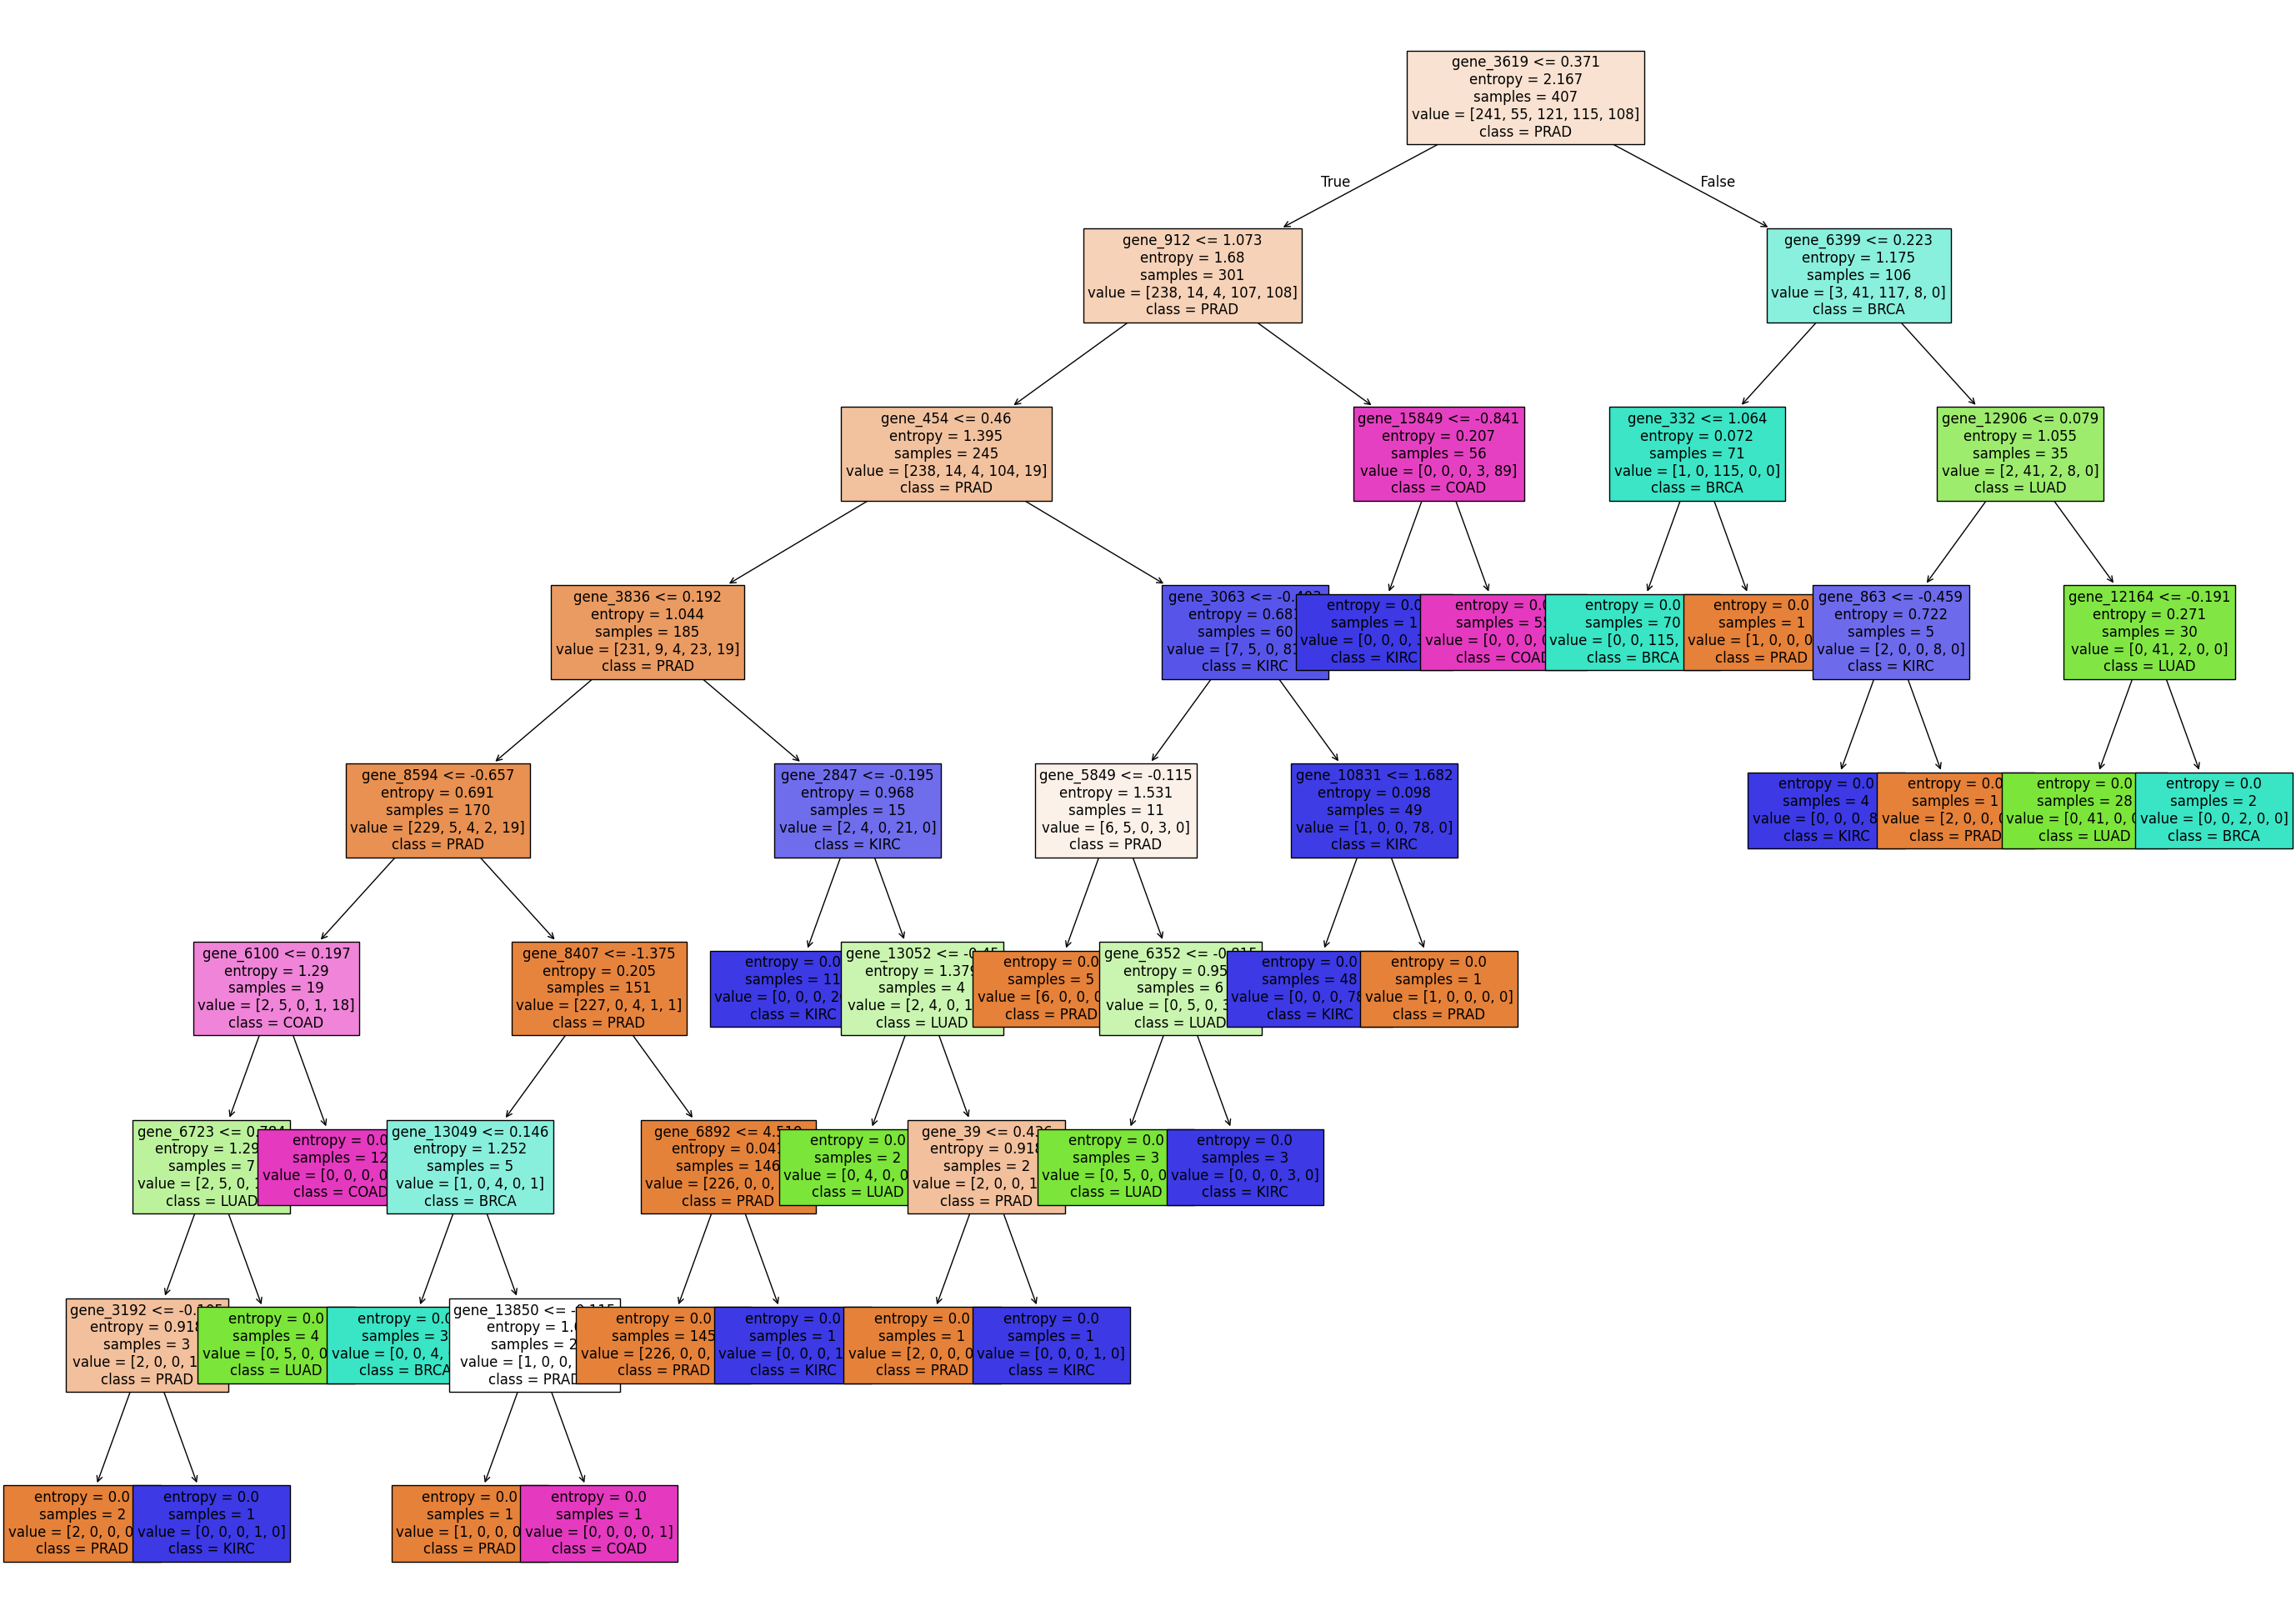

In [165]:
# Affichage premier arbre
# Création d'une figure avec une taille spécifique (large : 35x25 pouces)
fig = plt.figure(figsize=(35,25))

# Affichage de l'arbre de décision :
# feature_names : noms des caractéristiques utilisées dans le modèle
# class_names : dictionnaire associant les classes à leurs libellés (0:'PRAD', 1:'LUAD',2:'BRCA',3:'KIRC',4:'COAD')
# filled=True : remplit les nœuds avec des couleurs représentant les classes
# fontsize=12 : ajuste la taille de la police pour une meilleure lisibilité
g1 = tree.plot_tree(tree_to_plot1, feature_names=feature_names, class_names={0:'PRAD', 1:'LUAD',2:'BRCA',3:'KIRC',4:'COAD'}, filled=True, fontsize=12)

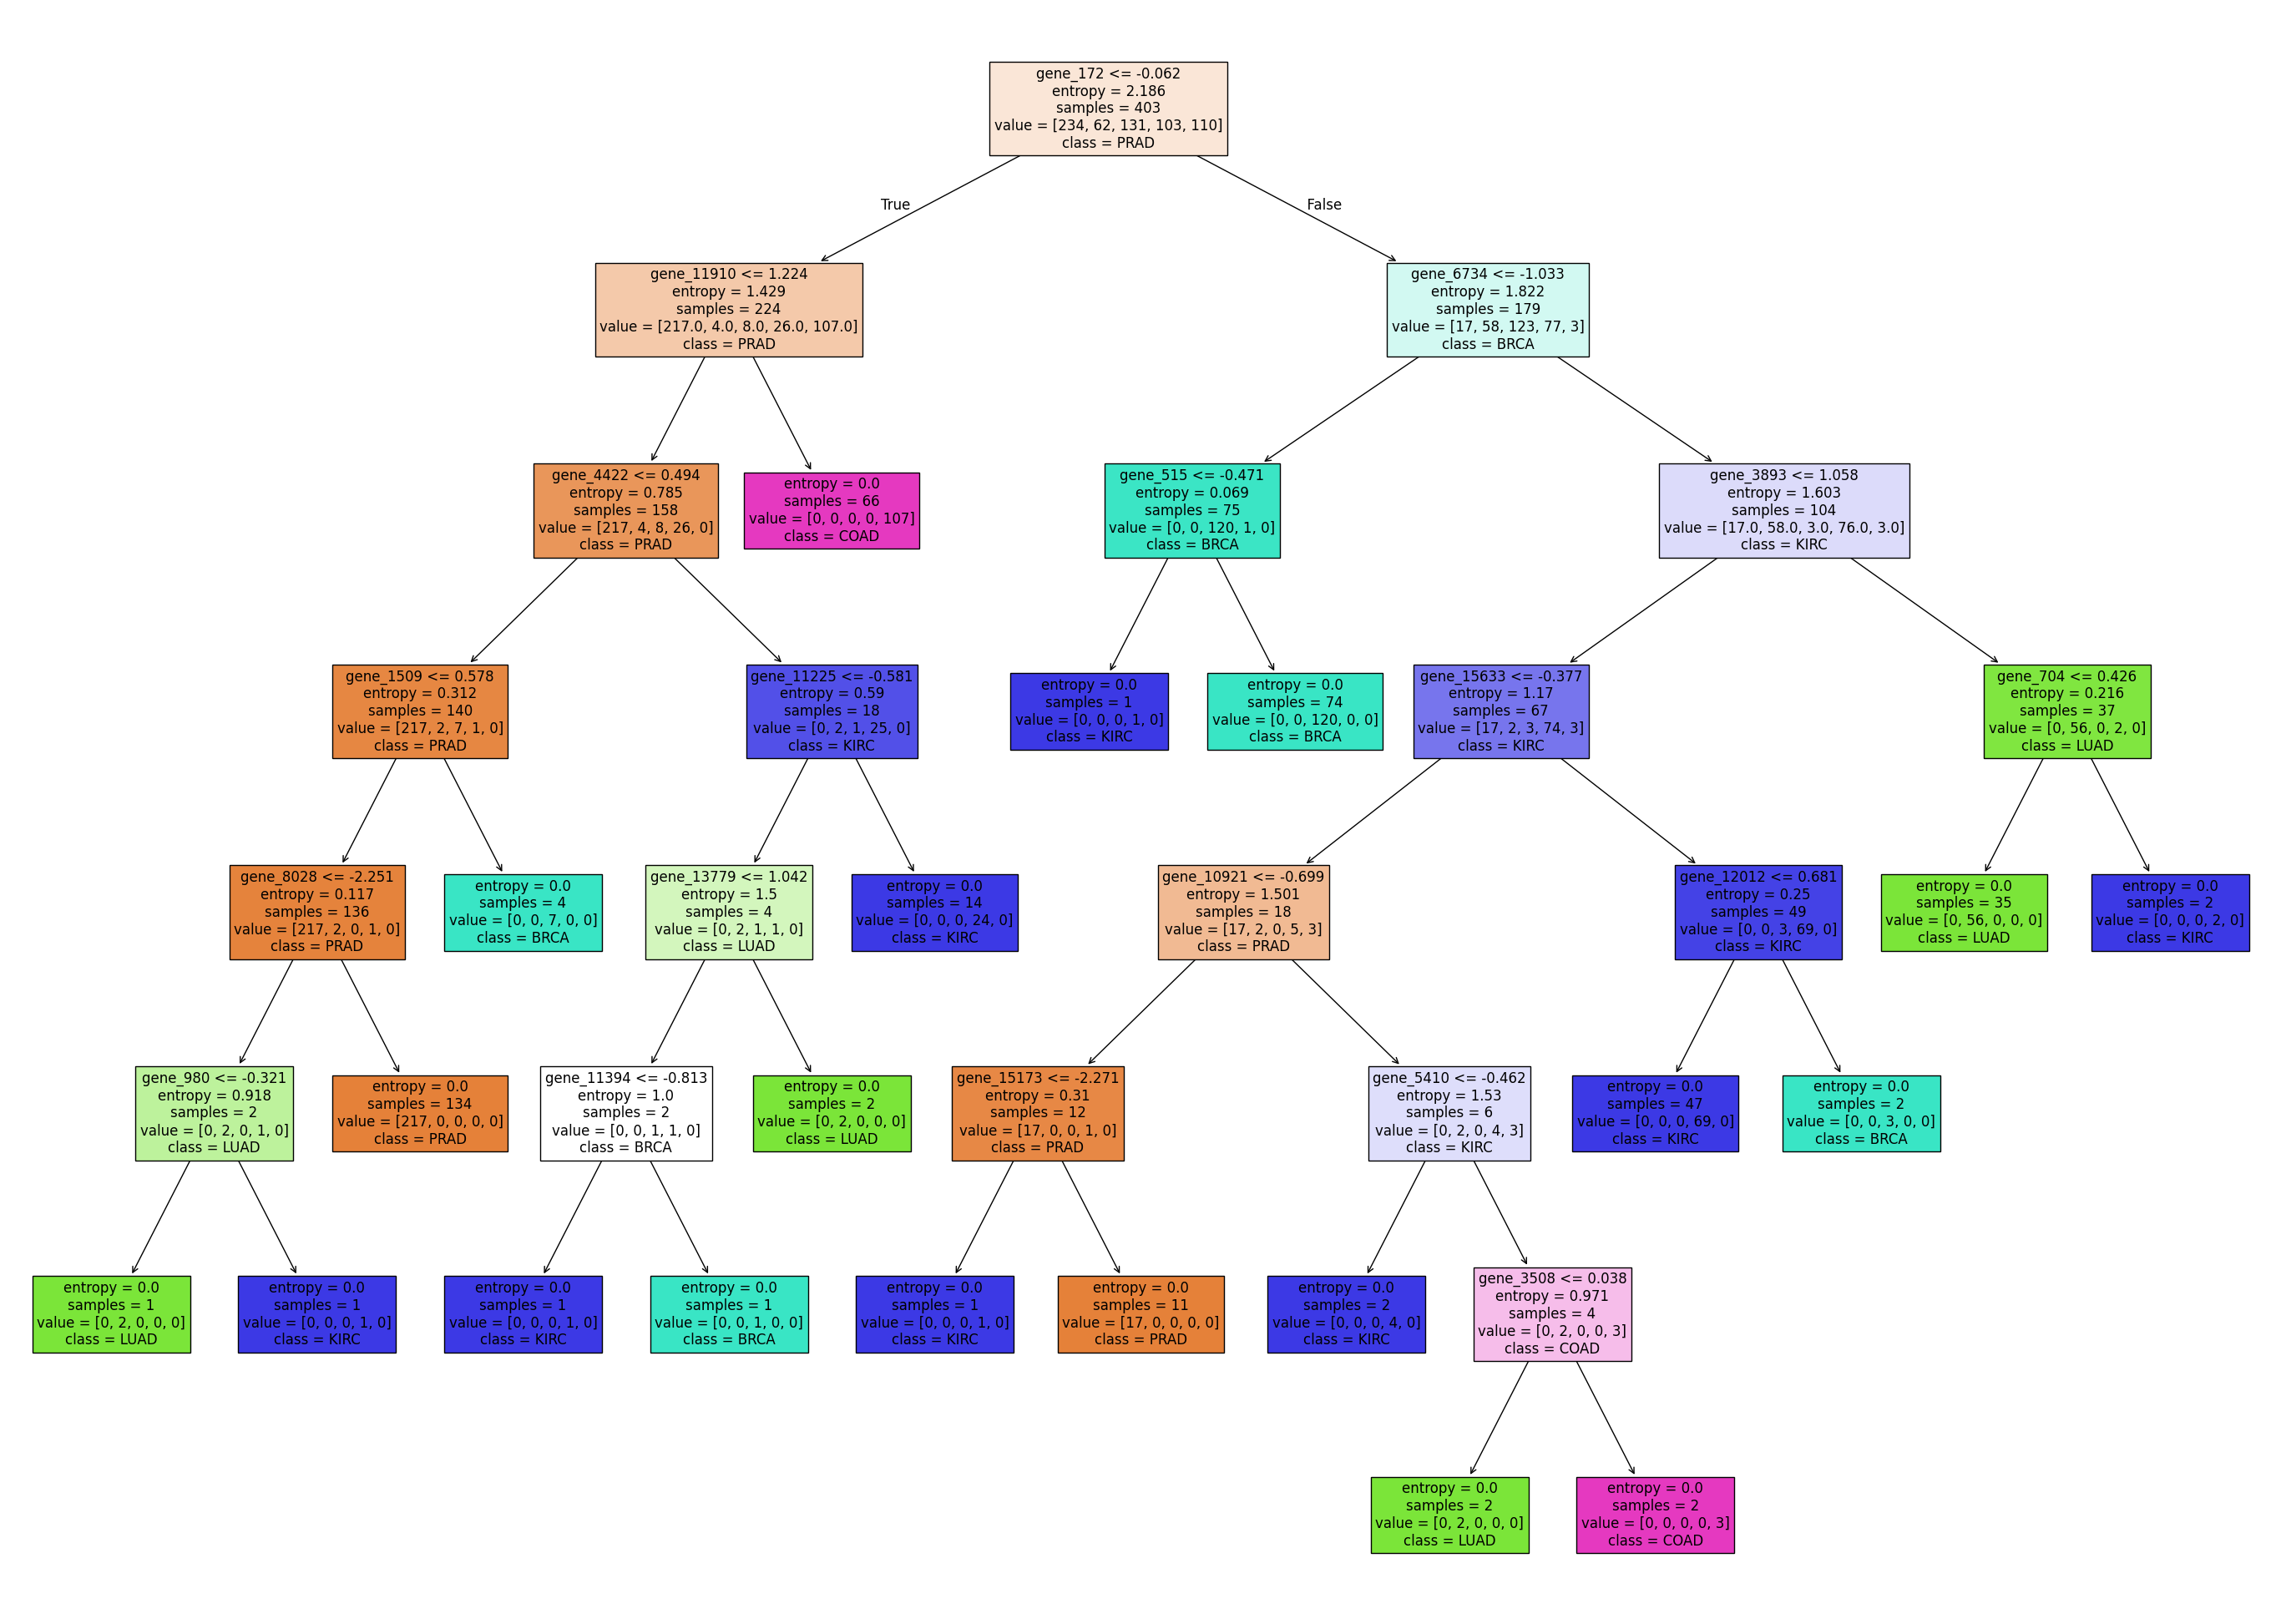

In [168]:
# Affichage deuxième arbre

# Création d'une figure avec une taille spécifique (large : 35x25 pouces)
fig = plt.figure(figsize=(35,25))

# Affichage de l'arbre de décision :
# feature_names : noms des caractéristiques utilisées dans le modèle
# class_names : dictionnaire associant les classes à leurs libellés (0:'PRAD', 1:'LUAD',2:'BRCA',3:'KIRC',4:'COAD')
# filled=True : remplit les nœuds avec des couleurs représentant les classes
# fontsize=12 : ajuste la taille de la police pour une meilleure lisibilité
g1 = tree.plot_tree(tree_to_plot2, feature_names=feature_names, class_names={0:'PRAD', 1:'LUAD',2:'BRCA',3:'KIRC',4:'COAD'}, filled=True, fontsize=12)

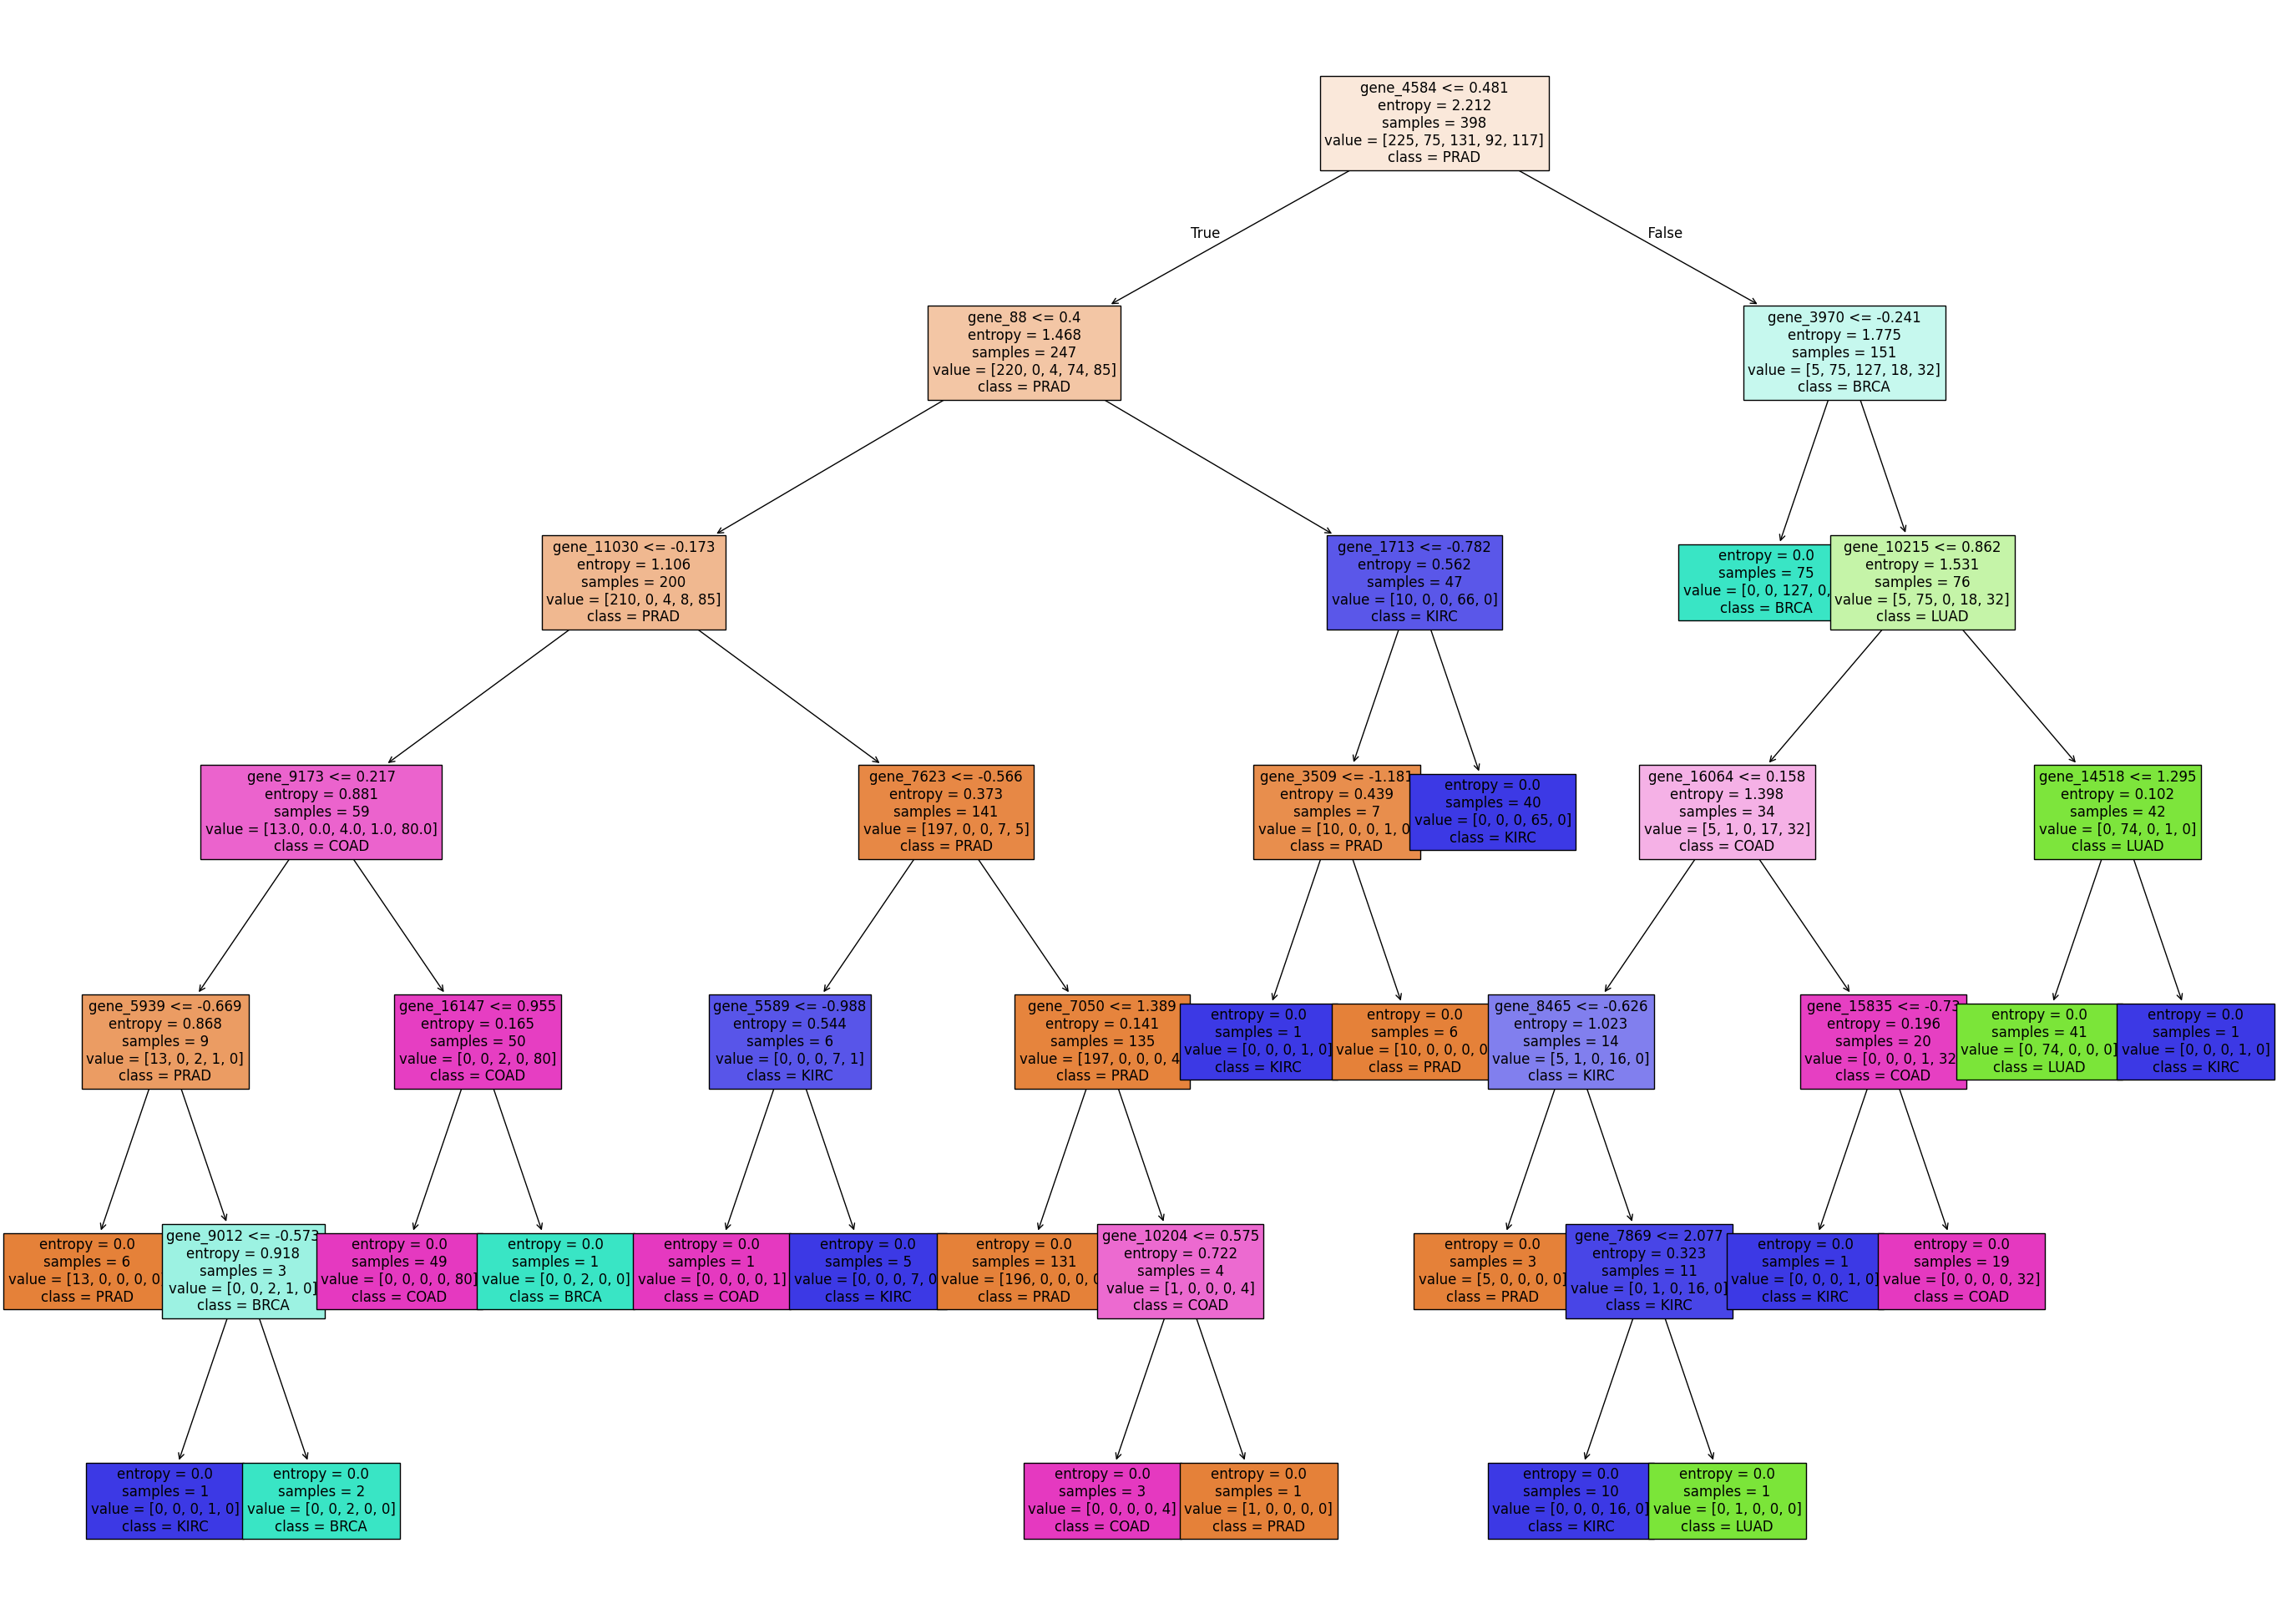

In [169]:
# Affichage troisième arbre
# Création d'une figure avec une taille spécifique (large : 35x25 pouces)
fig = plt.figure(figsize=(35,25))

# Affichage de l'arbre de décision :
# feature_names : noms des caractéristiques utilisées dans le modèle
# class_names : dictionnaire associant les classes à leurs libellés (0:'PRAD', 1:'LUAD',2:'BRCA',3:'KIRC',4:'COAD')
# filled=True : remplit les nœuds avec des couleurs représentant les classes
# fontsize=12 : ajuste la taille de la police pour une meilleure lisibilité
g1 = tree.plot_tree(tree_to_plot3, feature_names=feature_names, class_names={0:'PRAD', 1:'LUAD',2:'BRCA',3:'KIRC',4:'COAD'}, filled=True, fontsize=12)



**3.   BAYES**



In [183]:
# Construction de Bayes
NB_classifier = GaussianNB()

# entrainement de l'arbre de décision
NB_model = NB_classifier.fit(X1_train, Y1_train)

In [186]:
# Prédire les classes des données de test
NB_pred = NB_model.predict(X1_test)

In [190]:
# Calcul de la précision du modèle avec accuracy

model_accuracy = accuracy_score(Y1_test, NB_pred)

print("Accuracy du model de SKlearn est: ", np.round(model_accuracy, 2), '%')

Accuracy du model de SKlearn est:  0.65 %


**4. Perceptron**

In [191]:
from sklearn.linear_model import Perceptron # importation de Perceptron
#initialisation du modèle Perceptron
model = Perceptron(max_iter=1000, tol=1e-3, eta0=0.01)
# entrainement du modèle Perceptron
model.fit(X1_train, Y1_train)

Perceptron(eta0=0.01)

In [192]:
# Prédictions sur les données de test
P_pred = model.predict(X1_test)

In [193]:
# Évaluation du modèle
accuracy = accuracy_score(Y1_test, P_pred)
print("Précision du modèle Perceptron : {:.2f}%".format(accuracy * 100))

Précision du modèle Perceptron : 100.00%




**5.   MLP**




In [194]:
from sklearn.neural_network import MLPClassifier # importation de MLPClassifier
# Création du modèle MLP avec des paramètres spécifiques
mlp = MLPClassifier(
    hidden_layer_sizes=(100,),  # 1 couche cachée de 100 neurones
    max_iter=1000,              # Nombre d'itérations maximum
    tol=1e-4,                   # Critère d'arrêt (perte minimale entre deux itérations)
    learning_rate='adaptive',   # Le taux d'apprentissage s'adapte
    random_state=42
)

# Entraînement du modèle MLP
mlp.fit(X1_train, Y1_train)

MLPClassifier(learning_rate='adaptive', max_iter=1000, random_state=42)

In [195]:
# Prédictions sur les données de test
MLP_pred = mlp.predict(X1_test)

# Évaluation du modèle
accuracy = accuracy_score(Y1_test, MLP_pred)
print("Précision du modèle MLP : {:.2f}%".format(accuracy * 100))

Précision du modèle MLP : 100.00%


**PCA**

In [196]:
# Importation de la classe PCA du module sklearn.decomposition
from sklearn.decomposition import PCA
# Création d'une instance de PCA pour réduire les données à 2 dimensions
pca = PCA(n_components=2)
# Application de PCA sur les données d'entraînement (X1_train) pour réduire leur dimensionnalité à 2
X_pca = pca.fit_transform(X1_train)

# Application de PCA sur les données de test (X1_test) pour réduire leur dimensionnalité à 2
Y_pca = pca.fit_transform(X1_test)


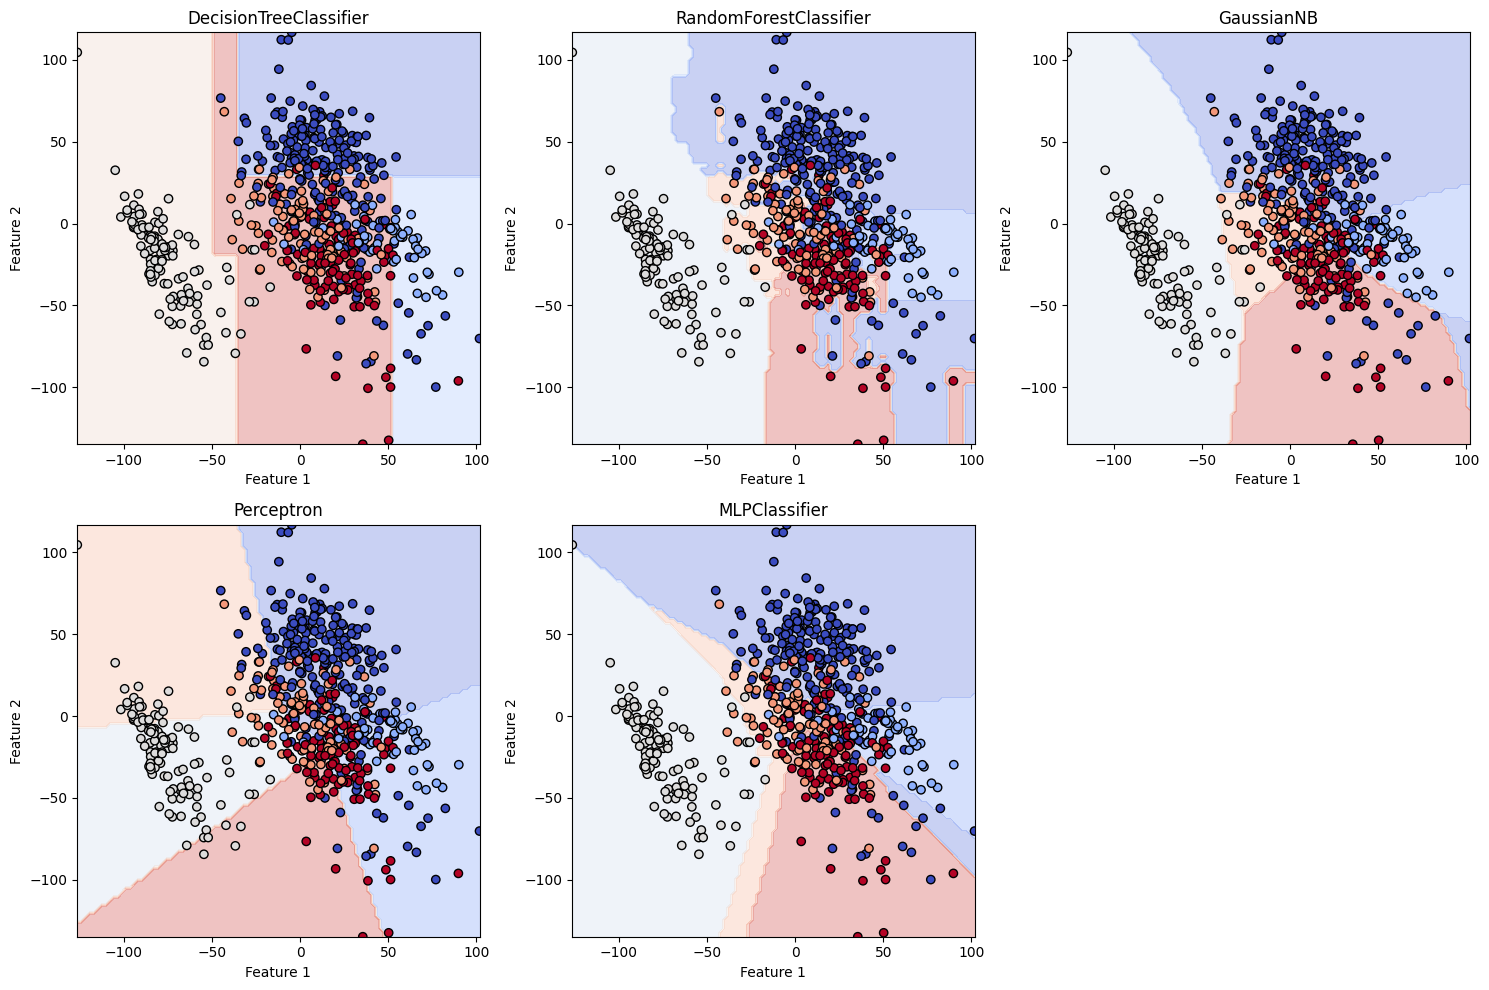

In [197]:
# Extraction des deux premières caractéristiques pour la visualisation
X_train_2d = X_pca[:, :2] # On sélectionne les deux premières dimensions après PCA pour la visualisation

# Création d'un tuple de modèles à tester
models = (
    DecisionTreeClassifier(max_depth=3), #Arbre de décision avec profondeur maximale de 3
    RandomForestClassifier(criterion='entropy', random_state=42),# Forêt aléatoire utilisant l'entropie comme critère
    GaussianNB(),# Classificateur naïf bayésien gaussien
    Perceptron(max_iter=1000, tol=1e-3, eta0=0.01),# Perceptron avec 1000 itérations maximales et un taux d'apprentissage de 0.01
    MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, tol=1e-4, learning_rate='adaptive', random_state=42) # Réseau de neurones multicouche avec 100 neurones dans la couche cachée
)

# Création de la figure pour les visualisations
plt.figure(figsize=(15, 10)) # Spécification de la taille de la figure

# Boucle sur chaque modèle pour l'entraîner et visualiser la frontière de décision
for i, model in enumerate(models):
    model.fit(X_train_2d, Y1_train)# Entraînement du modèle sur les deux premières caractéristiques

    # Création d'une grille pour visualiser la frontière décisionnelle
    xx, yy = np.meshgrid(
        np.linspace(X_train_2d[:, 0].min(), X_train_2d[:, 0].max(), 100),# Plage de valeurs pour la première caractéristique
        np.linspace(X_train_2d[:, 1].min(), X_train_2d[:, 1].max(), 100) # Plage de valeurs pour la deuxième caractéristique
    )

    grid_points = np.c_[xx.ravel(), yy.ravel()] # Fusionner les coordonnées de la grille
    grid_predictions = model.predict(grid_points) # Prédiction des labels pour chaque point de la grille

    # Affichage de la frontière de décision
    plt.subplot(2, 3, i + 1) # Positionner chaque sous-graphique dans une grille 2x3
    plt.contourf(xx, yy, np.array(grid_predictions).reshape(xx.shape), alpha=0.3, cmap='coolwarm') # Tracer la frontière de décision
    plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=Y1_train, edgecolors='k', marker='o', cmap='coolwarm') # Tracer les points de données
    plt.title(type(model).__name__) # Afficher le nom du modèle comme titre
    plt.xlabel('Feature 1')# Label de l'axe x
    plt.ylabel('Feature 2') # Label de l'axe y

# Ajuster l'espacement des sous-graphes pour un affichage propre
plt.tight_layout()
plt.show() # Afficher la figure avec toutes les visualisations

**Diagramme du temps de calcul des modèles**

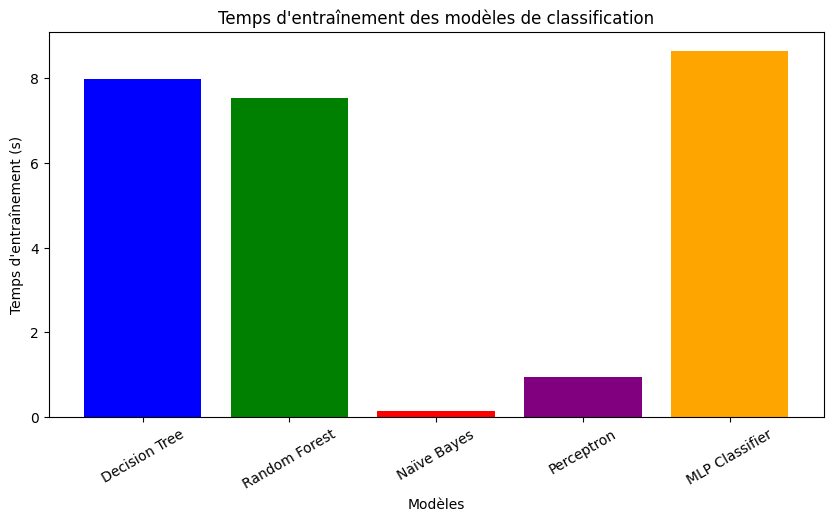

In [198]:
import time # Importation de la bibliothèque time pour mesurer le temps d'exécution

# Définir les modèles
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=3),# Modèle d'arbre de décision avec profondeur maximale de 3
    "Random Forest": RandomForestClassifier(criterion="entropy", random_state=42),# Forêt aléatoire avec critère "entropy"
    "Naïve Bayes": GaussianNB(),# Modèle Naïve Bayes
    "Perceptron": Perceptron(max_iter=1000, tol=1e-3, eta0=0.01),# Perceptron avec un nombre maximum d'itérations de 1000
    "MLP Classifier": MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, tol=1e-4, learning_rate="adaptive", random_state=42)# Classificateur MLP avec 100 neurones dans la couche cachée
}

# Mesurer le temps d'entraînement
times = {} # Dictionnaire pour stocker les temps d'entraînement
for name, model in models.items(): # Boucle sur chaque modèle
    start_time = time.time()# Enregistrer l'heure de départ avant l'entraînement
    model.fit(X1_train, Y1_train) # Entraîner le modèle avec les données d'entraînement
    times[name] = time.time() - start_time  # Calculer le temps écoulé et l'ajouter au dictionnaire 'times'

# Tracer le diagramme en barres
plt.figure(figsize=(10, 5)) # Créer une nouvelle figure pour le graphique
plt.bar(times.keys(), times.values(), color=["blue", "green", "red", "purple", "orange"]) # Tracer le diagramme en barres
plt.xlabel("Modèles") # Ajouter un label pour l'axe des X
plt.ylabel("Temps d'entraînement (s)") # Ajouter un label pour l'axe des Y
plt.title("Temps d'entraînement des modèles de classification") # Ajouter un titre au graphique
plt.xticks(rotation=30) # Rotation des étiquettes de l'axe des X pour une meilleure lisibilité
plt.show()# Afficher le graphique